# import library


In [15]:
library(data.table)
library(dplyr)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(EnsDb.Hsapiens.v75)
library(clusterProfiler)
library(AnnotationDbi)
library(org.Hs.eg.db)
library(ggplot2)
library(IRdisplay)
library(ChIPpeakAnno)
library(IRdisplay)
library(ggpubr)
library(DiffBind)
library(kableExtra)
library(excluderanges)
library(DESeq2)
library(data.table)
library(dplyr)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(EnsDb.Hsapiens.v75)
library(clusterProfiler)
library(AnnotationDbi)
library(org.Hs.eg.db)
library(ggplot2)
library(gridExtra)
library(IRdisplay)
library(ChIPpeakAnno)
library(IRdisplay)
library(ggpubr)
library(DiffBind)
library(kableExtra)
library(tidyverse)
library(readxl)
library(umap)
library(ggrepel)
library(msigdbr)
library(fgsea)
library(ggvenn)
library(ComplexHeatmap)
library(ggVennDiagram)
library(venneuler)
library(sva)
library(DT)
library(tools)
library(tidyverse)
library(maSigPro)

library(edgeR)

txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

base_dir = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/'
setwd(base_dir)



# load data

In [ ]:
REFERENCE_GENOME="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF"
REFERENCE_GENOME_FASTA='/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.fa'
GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.ncbiRefSeq.gtf"
TE_GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf"


In [ ]:
library(GenomeInfoDb)
library(rtracklayer)
library(txdbmaker)


In [ ]:
gff_te <- import(TE_GTF_FILE)


In [65]:
gff <- import(GTF_FILE)
chrominfo <- getChromInfoFromNCBI("T2T-CHM13v2.0")
chrominfo = chrominfo[1:24, ]
seqinfo(gff) = Seqinfo(seqnames = seqlevels(gff), seqlengths = chrominfo$SequenceLength, isCircular = chrominfo$circular, genome = 'T2T-CHM13v2.0')

In [66]:
txdb <- makeTxDbFromGRanges(gff, taxonomyId=9606)
txdb


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


TxDb object:
# Db type: TxDb
# Supporting package: GenomicFeatures
# Genome: T2T-CHM13v2.0
# Organism: Homo sapiens
# Taxonomy ID: 9606
# Nb of transcripts: 194234
# Db created by: GenomicFeatures package from Bioconductor
# Creation time: 2024-07-12 09:33:44 -0500 (Fri, 12 Jul 2024)
# GenomicFeatures version at creation time: 1.52.1
# RSQLite version at creation time: 2.3.4
# DBSCHEMAVERSION: 1.2

In [67]:
saveRDS(txdb, file = 't2t_coding_txdb.rds')

In [13]:
te_dt = readRDS('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/te_dt_may08.rds')

In [14]:
head(te_dt)

chr,rmsk,exon,start,end,width,strand,score,gene_id,transcript_id,family_id,class_id,idd,idd_2
<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,UCSC_rmsk,exon,2710,4402,5119,-,.,TAR1,TAR1_dup164,subtelo,Satellite,TAR1_dup164:TAR1:subtelo:Satellite,chr1_2710_4402__TAR1_dup164:TAR1:subtelo:Satellite
chr1,UCSC_rmsk,exon,4083,4533,962,-,.,LTR60B,LTR60B_dup190,ERV1,LTR,LTR60B_dup190:LTR60B:ERV1:LTR,chr1_4083_4533__LTR60B_dup190:LTR60B:ERV1:LTR
chr1,UCSC_rmsk,exon,4534,4660,505,-,.,LTR60B,LTR60B_dup191,ERV1,LTR,LTR60B_dup191:LTR60B:ERV1:LTR,chr1_4534_4660__LTR60B_dup191:LTR60B:ERV1:LTR
chr1,UCSC_rmsk,exon,4664,5263,1304,+,.,L1MC3,L1MC3_dup5932,L1,LINE,L1MC3_dup5932:L1MC3:L1:LINE,chr1_4664_5263__L1MC3_dup5932:L1MC3:L1:LINE
chr1,UCSC_rmsk,exon,5275,5528,1403,+,.,MER34C_v,MER34C_v_dup375,ERV1,LTR,MER34C_v_dup375:MER34C_v:ERV1:LTR,chr1_5275_5528__MER34C_v_dup375:MER34C_v:ERV1:LTR
chr1,UCSC_rmsk,exon,5529,5686,3544,+,.,L1MC3,L1MC3_dup5932,L1,LINE,L1MC3_dup5932:L1MC3:L1:LINE,chr1_5529_5686__L1MC3_dup5932:L1MC3:L1:LINE


In [136]:
dsn = fread('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/dsn_atac_12Jul.tsv')
head(dsn[, .(sample_name, cell_type)])

sample_name,cell_type
<chr>,<chr>
D4983_HSC_1,HSC
D6792_HSC_1,HSC
D7291_CD34_1,CD34
D7292_CD34_2,CD34
D1020_CBCD34_1,CBCD34
D1022_B_1,B


In [367]:
chrom_sel = paste0('chr', 1:22)
t2t_chrom_size = fread('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/genomes/t2t/t2t_sizes_genome')
t2t_chrom_size = t2t_chrom_size[V1 %in% chrom_sel, ]
t2t_chrom_size = sum(t2t_chrom_size$V2)
t2t_chrom_size


[1] 2900555906

# load blacklist

In [40]:
#https://drive.google.com/drive/folders/1sF9m8Y3eZouTZ3IEEywjs2kfHOWFBSJT
t2t_exclude = fread('T2T.excluderanges.bed')
setnames(t2t_exclude, c('chr', 'start', 'end', 'type'))
t2t_exclude[, width := end - start]
dim(t2t_exclude)
head(t2t_exclude)
sum(t2t_exclude$width)
t2t_exclude_gr = makeGRangesFromDataFrame(t2t_exclude)

[1] 3565    5

chr,start,end,type,width
<chr>,<int>,<int>,<chr>,<int>
chr1,0,257700,High Signal Region,257700
chr1,1125300,1182900,Low Mappability,57600
chr1,2096500,2103700,High Signal Region,7200
chr1,12446500,12497900,High Signal Region,51400
chr1,12595200,12778100,High Signal Region,182900
chr1,15953900,16678600,High Signal Region,724700


[1] 275454700

# summary of blacklist, TE, and coding regions on T2T

In [89]:
sum(chrominfo$SequenceLength)

[1] 3117275501

In [118]:
tmp = as.data.table(as.data.frame(gff))
dim(tmp)
tmp = tmp[end > start, ]
dim(tmp)
head(tmp)
fwrite(tmp, file = 'coding.bed', sep = '\t', col.names = F) 

[1] 4667175      14

[1] 4664075      14

seqnames,start,end,width,strand,source,type,score,phase,gene_id,transcript_id,gene_name,exon_number,exon_id
<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
chrY,62449384,62451910,2527,-,ncbiRefSeq.2023-05-29,transcript,NA,NA,DDX11L16,NR_110561.1,DDX11L16,NA,NA
chrY,62449384,62450563,1180,-,ncbiRefSeq.2023-05-29,exon,NA,NA,DDX11L16,NR_110561.1,DDX11L16,3,NR_110561.1.3
chrY,62451063,62451171,109,-,ncbiRefSeq.2023-05-29,exon,NA,NA,DDX11L16,NR_110561.1,DDX11L16,2,NR_110561.1.2
chrY,62451557,62451910,354,-,ncbiRefSeq.2023-05-29,exon,NA,NA,DDX11L16,NR_110561.1,DDX11L16,1,NR_110561.1.1
chrY,62446549,62449392,2844,+,ncbiRefSeq.2023-05-29,transcript,NA,NA,LOC124908905,XM_047447183.1,LOC124908905,NA,NA
chrY,62446549,62446939,391,+,ncbiRefSeq.2023-05-29,exon,NA,NA,LOC124908905,XM_047447183.1,LOC124908905,1,XM_047447183.1.1


In [119]:
tmp = as.data.table(as.data.frame(gff_te))
dim(tmp)
tmp = tmp[end > start, ]
dim(tmp)
head(tmp)
fwrite(tmp, file = 'te.bed', sep = '\t', col.names = F) 

[1] 4711823      13

[1] 4711823      13

seqnames,start,end,width,strand,source,type,score,phase,gene_id,transcript_id,family_id,class_id
<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
chr1,2710,4402,1693,-,UCSC_rmsk,exon,5119,NA,TAR1,TAR1_dup164,subtelo,Satellite
chr1,4083,4533,451,-,UCSC_rmsk,exon,962,NA,LTR60B,LTR60B_dup190,ERV1,LTR
chr1,4534,4660,127,-,UCSC_rmsk,exon,505,NA,LTR60B,LTR60B_dup191,ERV1,LTR
chr1,4664,5263,600,+,UCSC_rmsk,exon,1304,NA,L1MC3,L1MC3_dup5932,L1,LINE
chr1,5275,5528,254,+,UCSC_rmsk,exon,1403,NA,MER34C_v,MER34C_v_dup375,ERV1,LTR
chr1,5529,5686,158,+,UCSC_rmsk,exon,3544,NA,L1MC3,L1MC3_dup5932,L1,LINE


In [123]:
system('sort-bed coding.bed > coding_sorted.bed')
system('sort-bed te.bed > te_sorted.bed')
system('bedops -m coding_sorted.bed > coding_sorted_merged.bed')
system('bedops -m te_sorted.bed > te_sorted_merged.bed')


In [124]:
gr1 = import('coding_sorted_merged.bed')
gr2 = import('te_sorted_merged.bed')


In [127]:
sum(as.data.frame(ranges(gr1))$width)
sum(as.data.frame(ranges(gr2))$width)

sum(as.data.frame(ranges(gr1))$width) / 3117275501
sum(as.data.frame(ranges(gr2))$width) / 3117275501

[1] 1682572074

[1] 1585107605

[1] 0.5397573

[1] 0.5084913

In [129]:
ov_coding_te = subsetByOverlaps(gr1, gr2)
sum(as.data.frame(ranges(ov_coding_te))$width)
fwrite(as.data.frame(ov_coding_te), file = 'coding_overlap_te.bed', sep = '\t')

#ov_coding_te = subsetByOverlaps(gr2, gr1)
#sum(as.data.frame(ranges(ov_coding_te))$width) # 133868


[1] 1673329863

In [130]:
ov_coding_te

GRanges object with 28069 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1       7507-138480      *
      [2]     chr1     144135-146717      *
      [3]     chr1     148563-205171      *
      [4]     chr1     205301-213723      *
      [5]     chr1     246379-248841      *
      ...      ...               ...    ...
  [28065]     chrY 62300584-62300832      *
  [28066]     chrY 62306326-62368760      *
  [28067]     chrY 62422544-62435805      *
  [28068]     chrY 62439554-62441822      *
  [28069]     chrY 62446550-62451910      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [103]:
ov = subsetByOverlaps(gr1, t2t_exclude_gr)
sum(as.data.frame(ranges(ov))$width) # 186886

ov = subsetByOverlaps(gr2, t2t_exclude_gr)
sum(as.data.frame(ranges(ov))$width) # 186886


[1] 186886

[1] 196391794

In [132]:
ov = subsetByOverlaps(gr2, t2t_exclude_gr)
sum(as.data.frame(ranges(ov))$width) # 186886
sum(as.data.frame(ranges(t2t_exclude_gr))$width) # 186886


[1] 196391794

[1] 275458265

In [133]:
tmp = makeGRangesFromDataFrame(te_dt[class_id == 'LTR', ])
ov = subsetByOverlaps(tmp, t2t_exclude_gr)
sum(as.data.frame(ranges(ov))$width) 


[1] 8695411

# load peaks

In [593]:
dsn[grep('HSC', sample_name), .(sample_name, cell_type)]

sample_name,cell_type
<chr>,<chr>
D4983_HSC_1,HSC
D6792_HSC_1,HSC
D2596_HSC_1,HSC
D7256_HSC_1,HSC
SU048_pHSC_1,pHSC
SU070_pHSC_1,pHSC
SU209_pHSC_1,pHSC
SU306_pHSC_1,pHSC
SU336_pHSC_1,pHSC


In [181]:
dsn[, cell_type_rep := paste0(cell_type, '_', 1:nrow(.SD)), by = 'cell_type' ]

In [250]:
atac_peaks = lapply(dsn$peak_file, ChIPQC:::GetGRanges, simple = F)
names(atac_peaks) = dsn$cell_type_rep


In [253]:
options(width=166)


In [304]:
atac_peaks = lapply(1:length(atac_peaks), function(ii){
    name = dsn$cell_type_rep[ii]
    gr = atac_peaks[[ii]]
    gr$ID = paste0(name, '__', sub('.*peak', 'peak', gr$ID))
    gr
    })
names(atac_peaks) = dsn$cell_type_rep


In [363]:
table(reduced_df$seqnames) 



 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrM  chrX  chrY 
55419 29571 29707 30167 23741 20674 19097 17566 18333 16837 13118 54506 14285  9820 11311 45470 40847 39613 39928 36415 33539 28909     2 22316  2639 

In [258]:
sum(unlist(lapply(atac_peaks, length)))


[1] 7879927

In [377]:
reduced <- GenomicRanges::reduce(unlist(GRangesList(atac_peaks)))
mcols(reduced) <- do.call(cbind, lapply(GRangesList(atac_peaks), function(x) (reduced %over%  x) + 0))
consensusIDs <- paste0("consensus_", seq(1, length(reduced)))
reduced$consensusIDs = consensusIDs


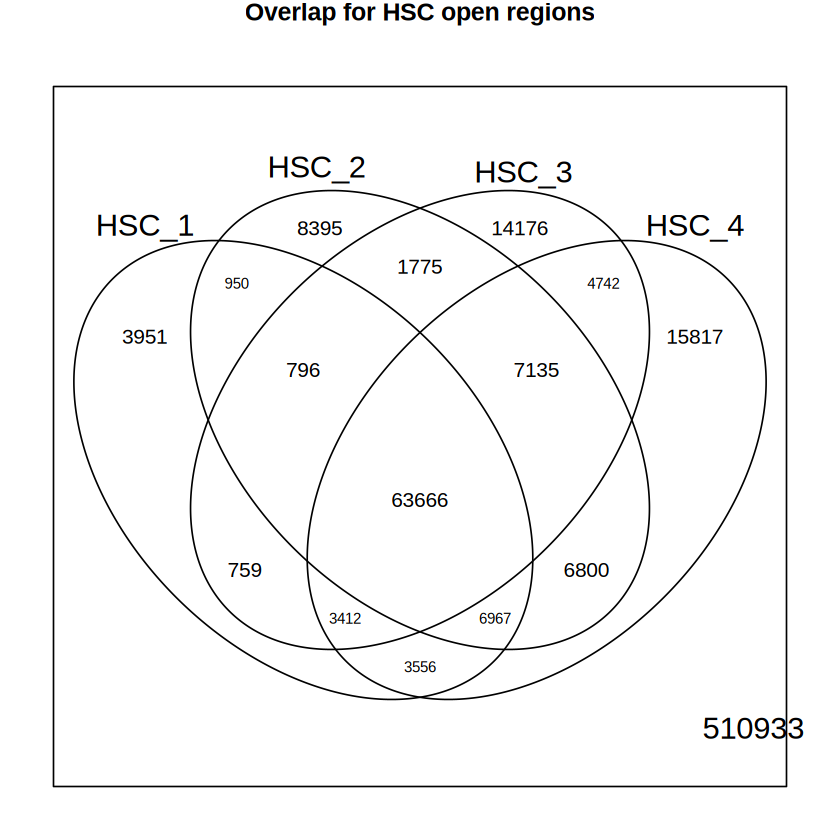

In [186]:
as.data.frame(elementMetadata(reduced)) %>% dplyr::select(starts_with("HSC")) %>%  vennDiagram(main = "Overlap for HSC open regions")


In [ ]:
library(tidyr)

myPlot <- as.data.frame(elementMetadata(reduced)) %>% dplyr::select(-consensusIDs) %>% 
    as.matrix %>% t %>% prcomp %>% .$x %>% data.frame %>% mutate(Samples = rownames(.)) %>% 
    mutate(Group = gsub("_\\d", "", Samples)) %>% ggplot(aes(x = PC1, y = PC2, 
    colour = Group)) + geom_point(size = 5)


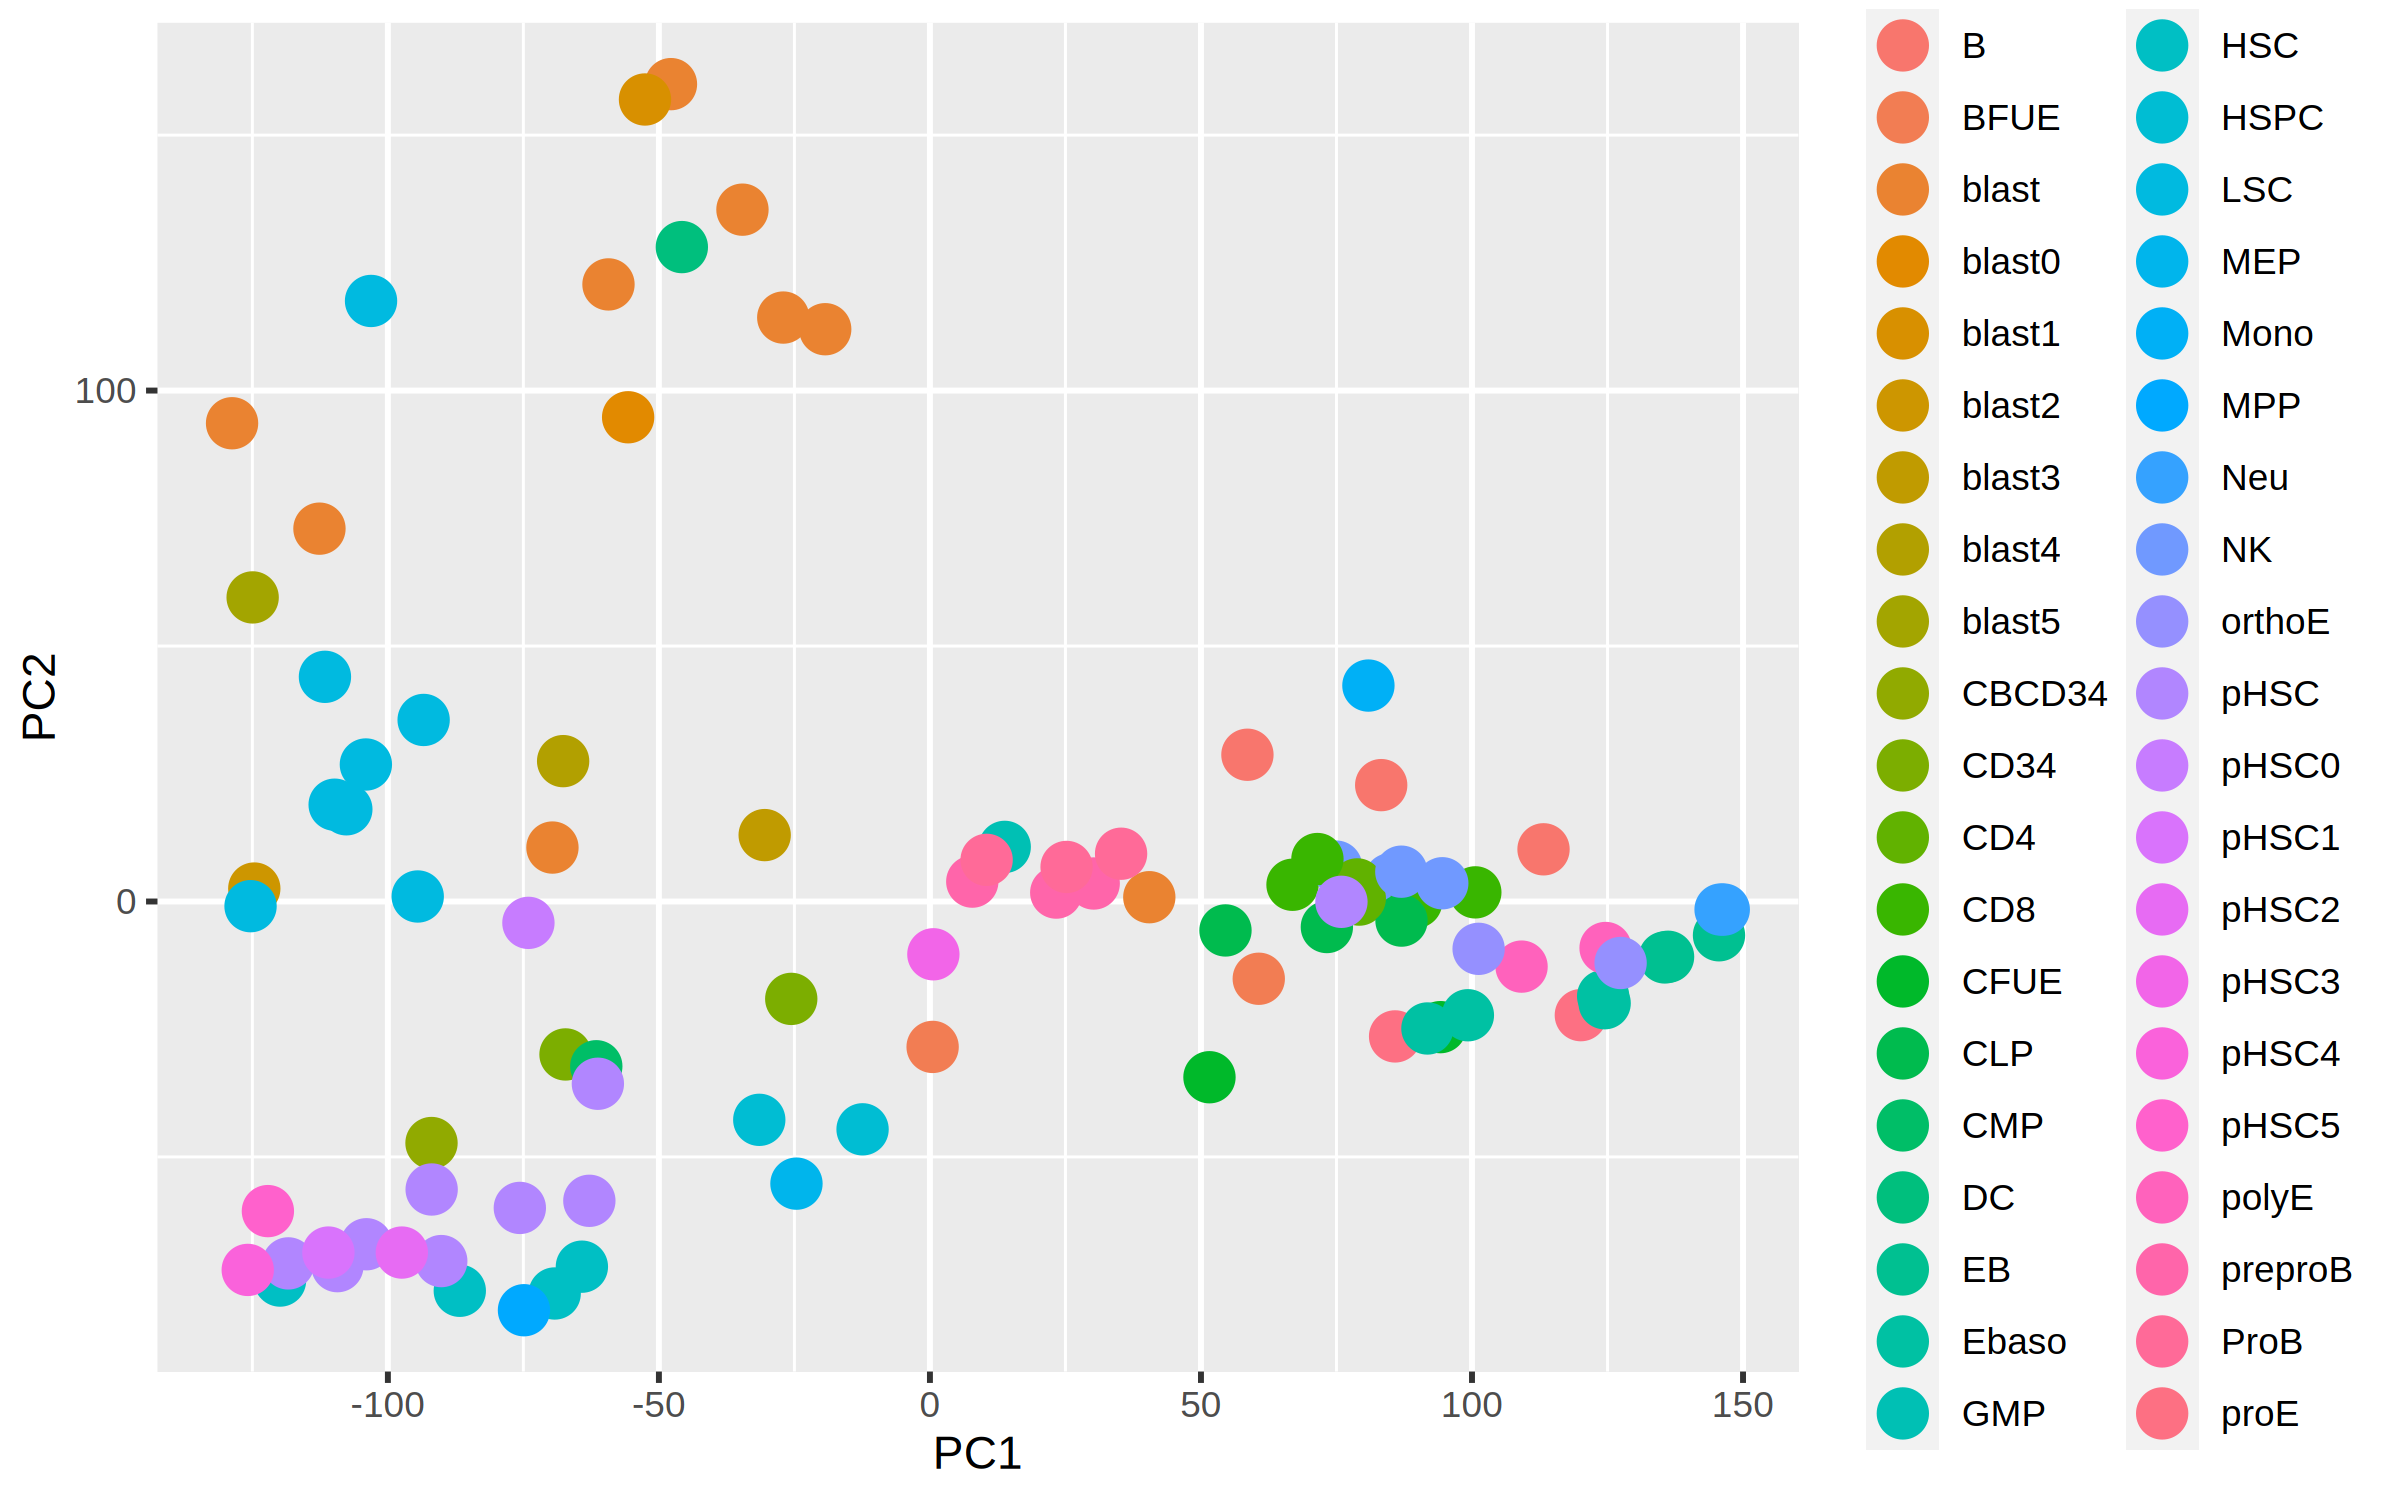

In [189]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 300)
myPlot

In [ ]:
library(Rsubread)
occurrences <- elementMetadata(reduced) %>% as.data.frame %>% dplyr::select(-consensusIDs) %>%  rowSums

table(occurrences) %>% rev %>% cumsum


In [378]:
reduced_df = as.data.frame(reduced)


In [379]:
dim(reduced_df)
head(reduced_df)


[1] 653830    102

,seqnames,start,end,width,strand,HSC_1,HSC_2,CD34_1,CD34_2,CBCD34_1,⋯,proE_2,Ebaso_1,Ebaso_2,Ebaso_3,Ebaso_4,polyE_1,polyE_2,orthoE_1,orthoE_2,consensusIDs
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1,413,2680,2268,*,0,0,0,0,0,⋯,0,0,1,0,0,0,1,1,0,consensus_1
2,chr1,2821,3194,374,*,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,consensus_2
3,chr1,3363,4011,649,*,0,0,0,0,0,⋯,1,0,0,0,1,0,0,0,0,consensus_3
4,chr1,4975,5422,448,*,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,consensus_4
5,chr1,7836,8145,310,*,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,consensus_5
6,chr1,9839,10039,201,*,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,consensus_6


plotdat = unlist(apply(reduced_df[, 6:101], 1, sum))


In [267]:
plotdat = sort(plotdat)
tail(plotdat)

[1] 96 96 96 96 96 96

Warning message:
"Removed 156134 rows containing non-finite values (`stat_density()`)."


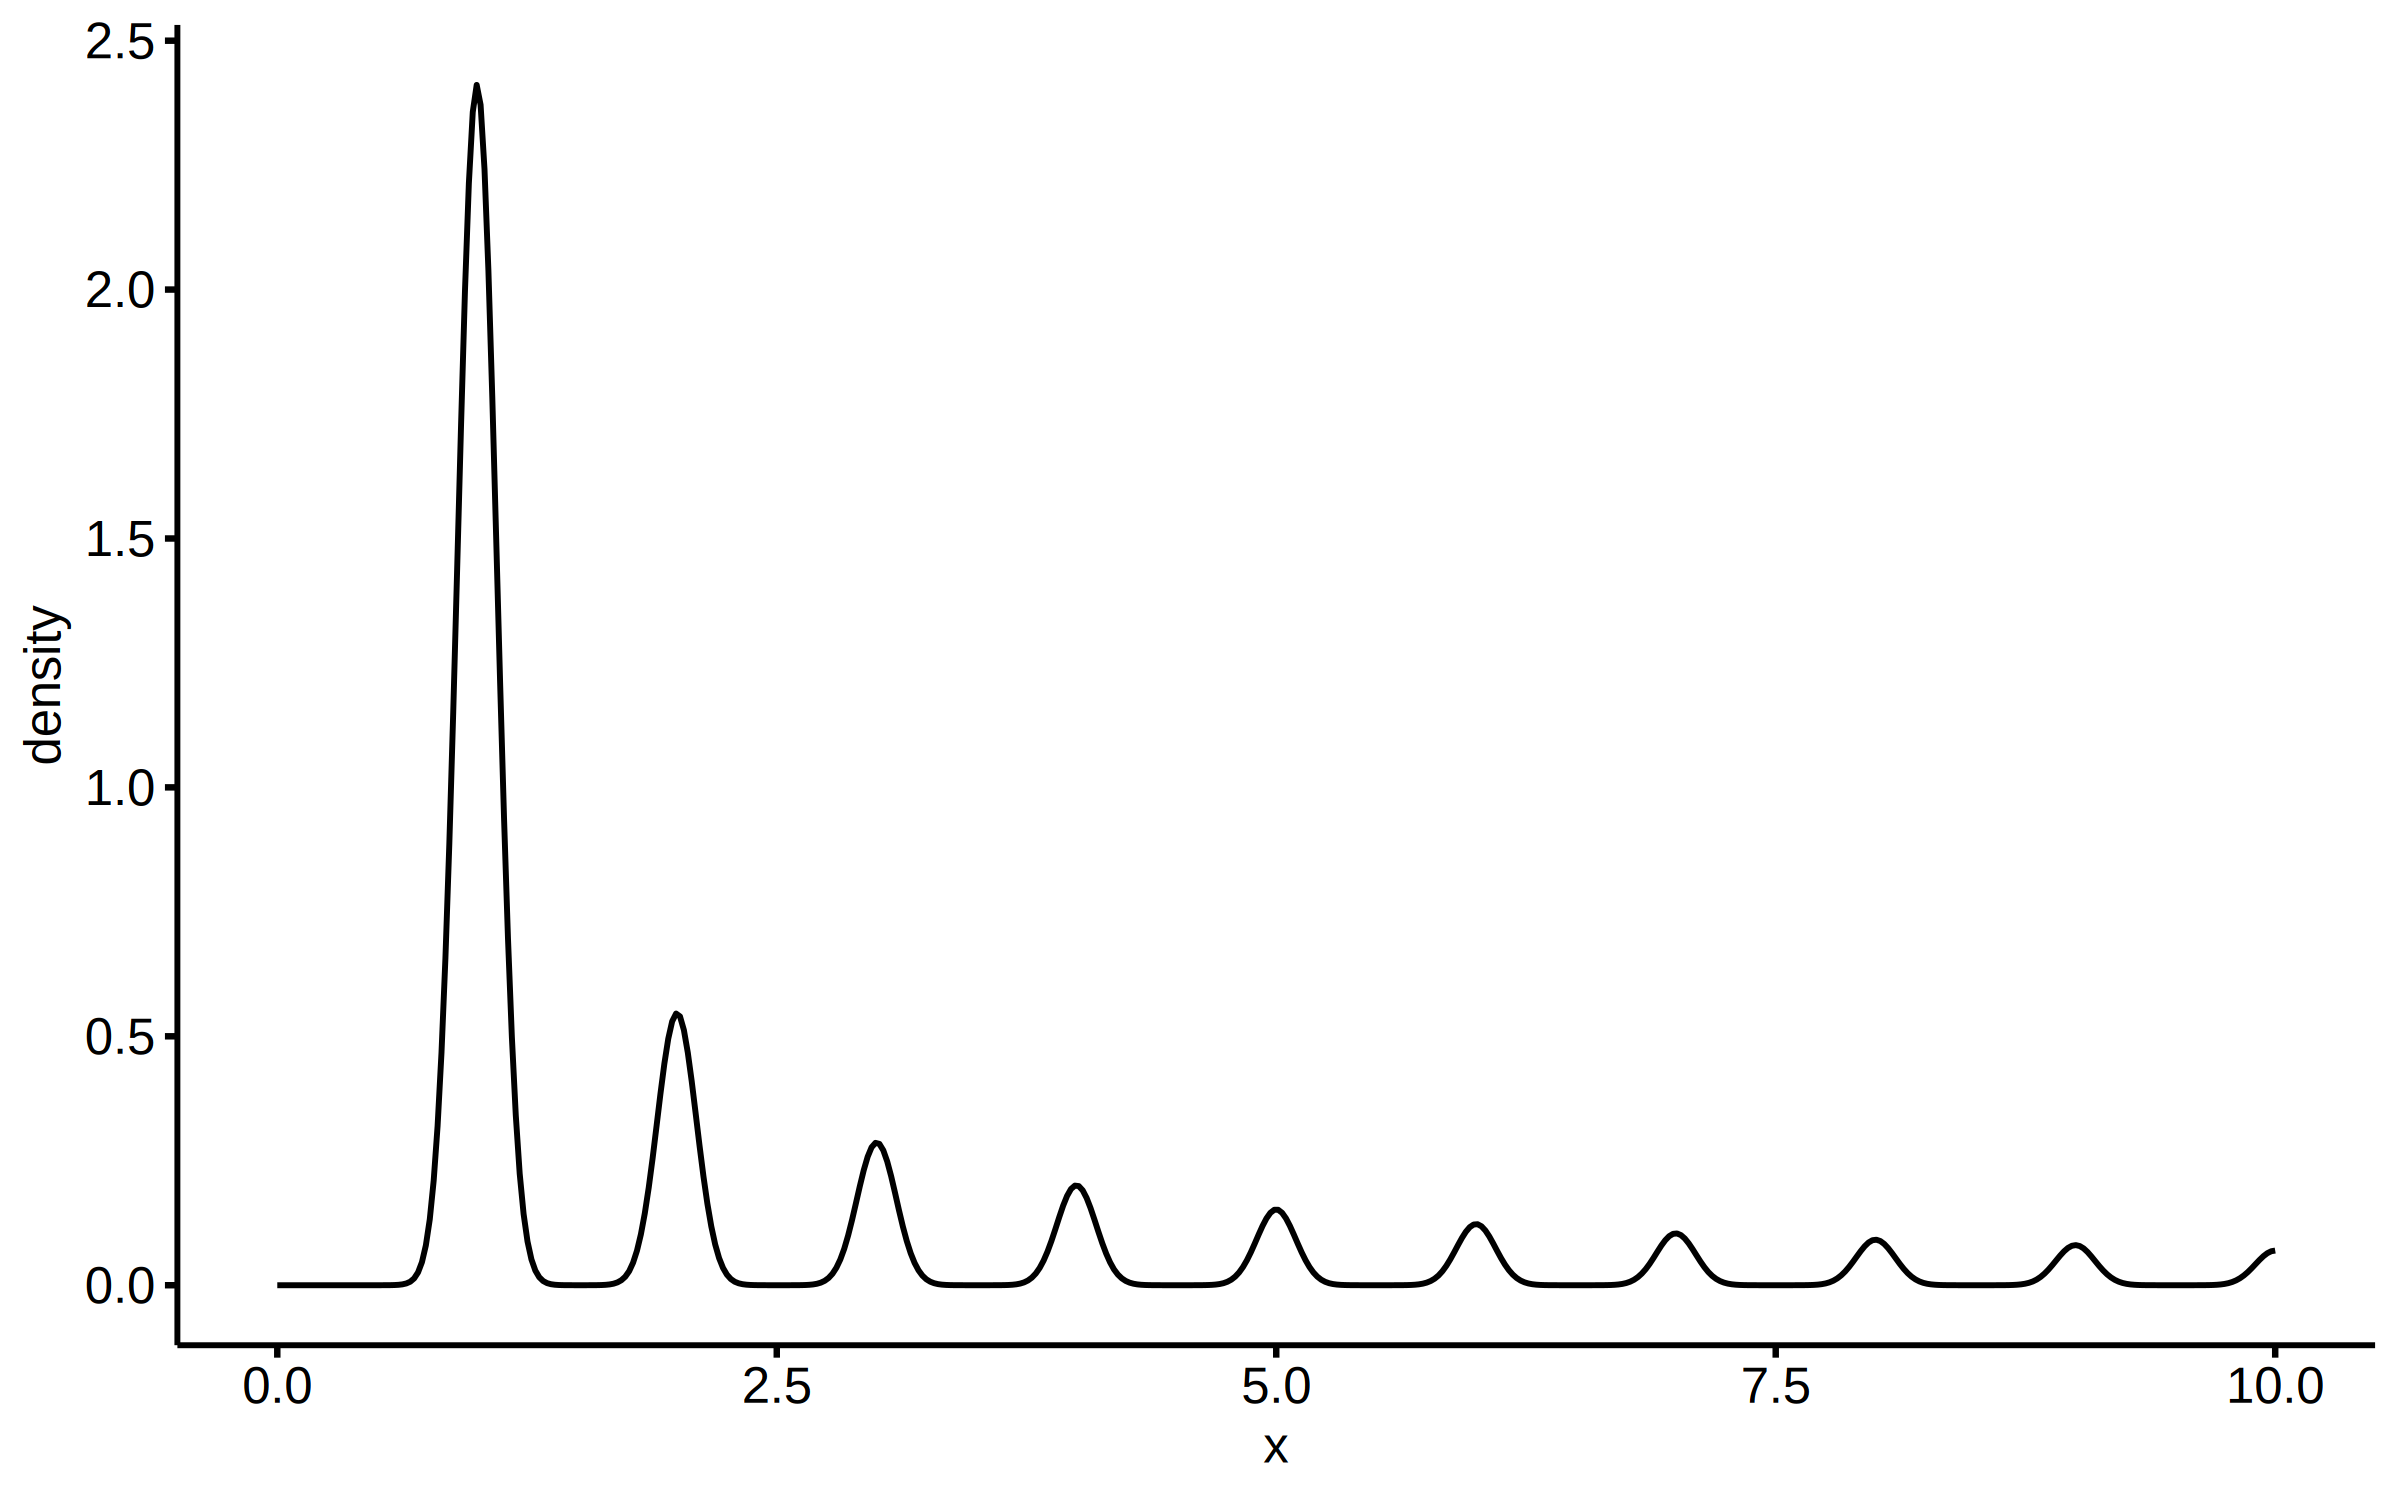

In [266]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 300)
ggdensity(plotdat) + xlim(0, 10)


# summary of peak number and opening width by cell types

In [449]:
sum_dt = data.table(peak_region = unlist(lapply(6:101, function(ii){
    sum(reduced_df$width[reduced_df[, ii] == 1]) })),
    peak_number = unlist(lapply(6:101, function(ii){
                        sum(reduced_df[, ii] == 1) })))

In [450]:
sum_dt$rn = colnames(reduced_df)[6:101]
sum_dt[, cell_type := sub('_.*', '', rn) ]
sum_dt[, cell_type := factor(cell_type, levels = cell_types) ]
sum_dt[, peak_region_per_1m := peak_region * 10000000 / t2t_chrom_size ] 
head(sum_dt)


peak_region,peak_number,rn,cell_type,peak_region_per_1m
<int>,<int>,<chr>,<fct>,<dbl>
86342288,84057,HSC_1,HSC,297675.0
94731157,96484,HSC_2,HSC,326596.6
78606119,74782,CD34_1,CD34,271003.6
92317759,92214,CD34_2,CD34,318276.1
101162578,104532,CBCD34_1,CBCD34,348769.6
33899220,29398,B_1,B,116871.5


In [442]:
cell_types = c('HSC', 'HSPC', 'MPP', 'CMP', 'GMP', 'MEP', 'CLP', 'CBCD34', 'LSC', 'pHSC', 'CD34', 'blast', 'preproB', 'ProB', 'B', 'DC', 
               'CD4', 'CD8', 'NK', 'Mono', 'Neu', 'EB', 'BFUE', 'CFUE', 'proE', 'Ebaso', 'polyE', 'orthoE')
cell_type_mye_sel = c('HSC', 'CMP', 'GMP', 'Mono', 'Neu')
cell_type_ery_sel = c('HSC', 'CMP', 'MEP', 'BFUE', 'CFUE', 'proE', 'Ebaso', 'polyE', 'orthoE', 'EB')


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


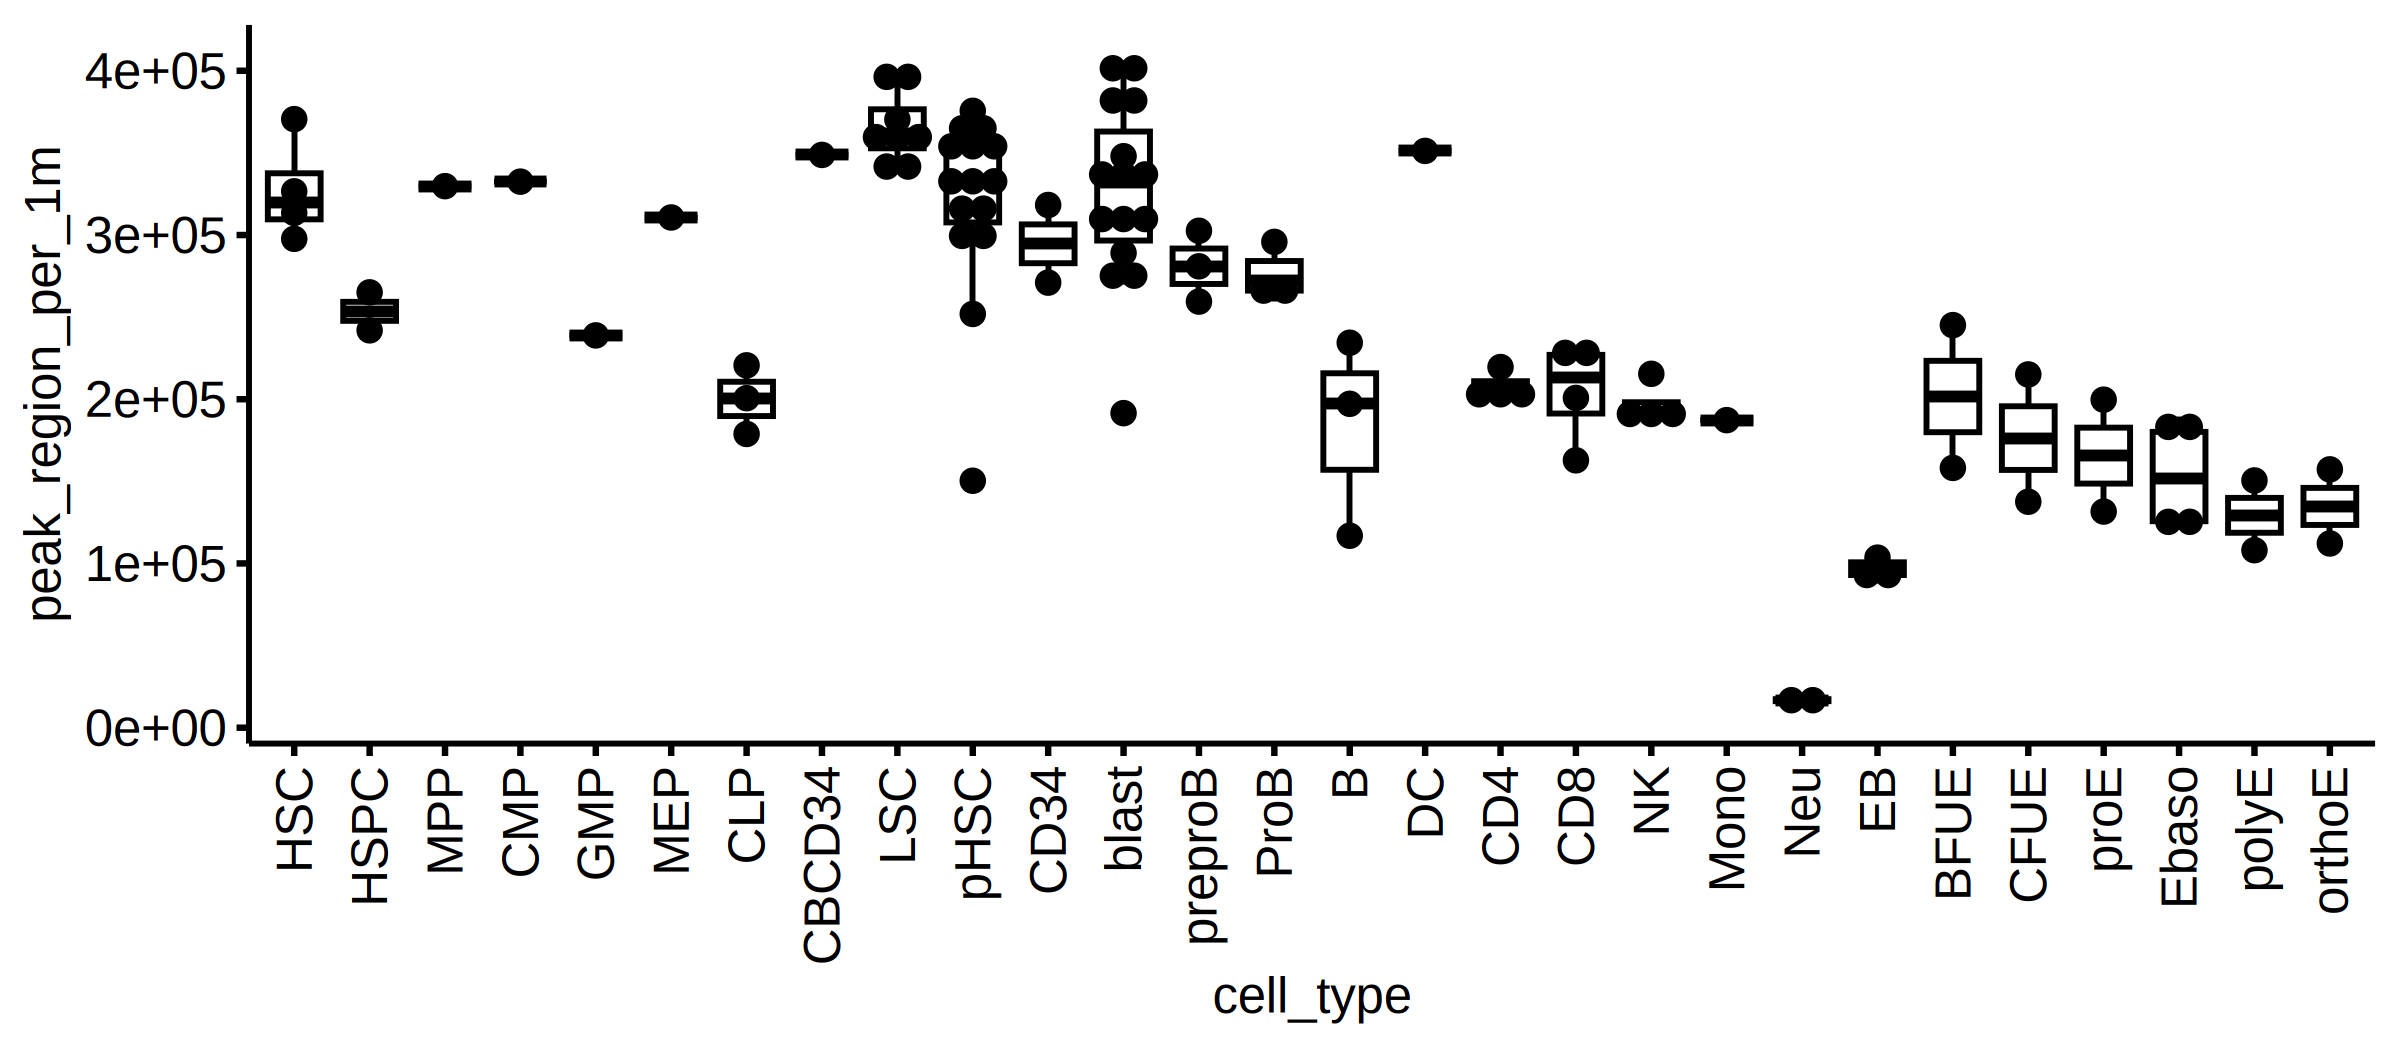

In [443]:
options(repr.plot.width = 8, repr.plot.height = 3.5, repr.plot.res = 300)
ggboxplot(sum_dt, x = 'cell_type', y = 'peak_region_per_1m', add = 'dotplot', outlier.shape = NA) +
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1))


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


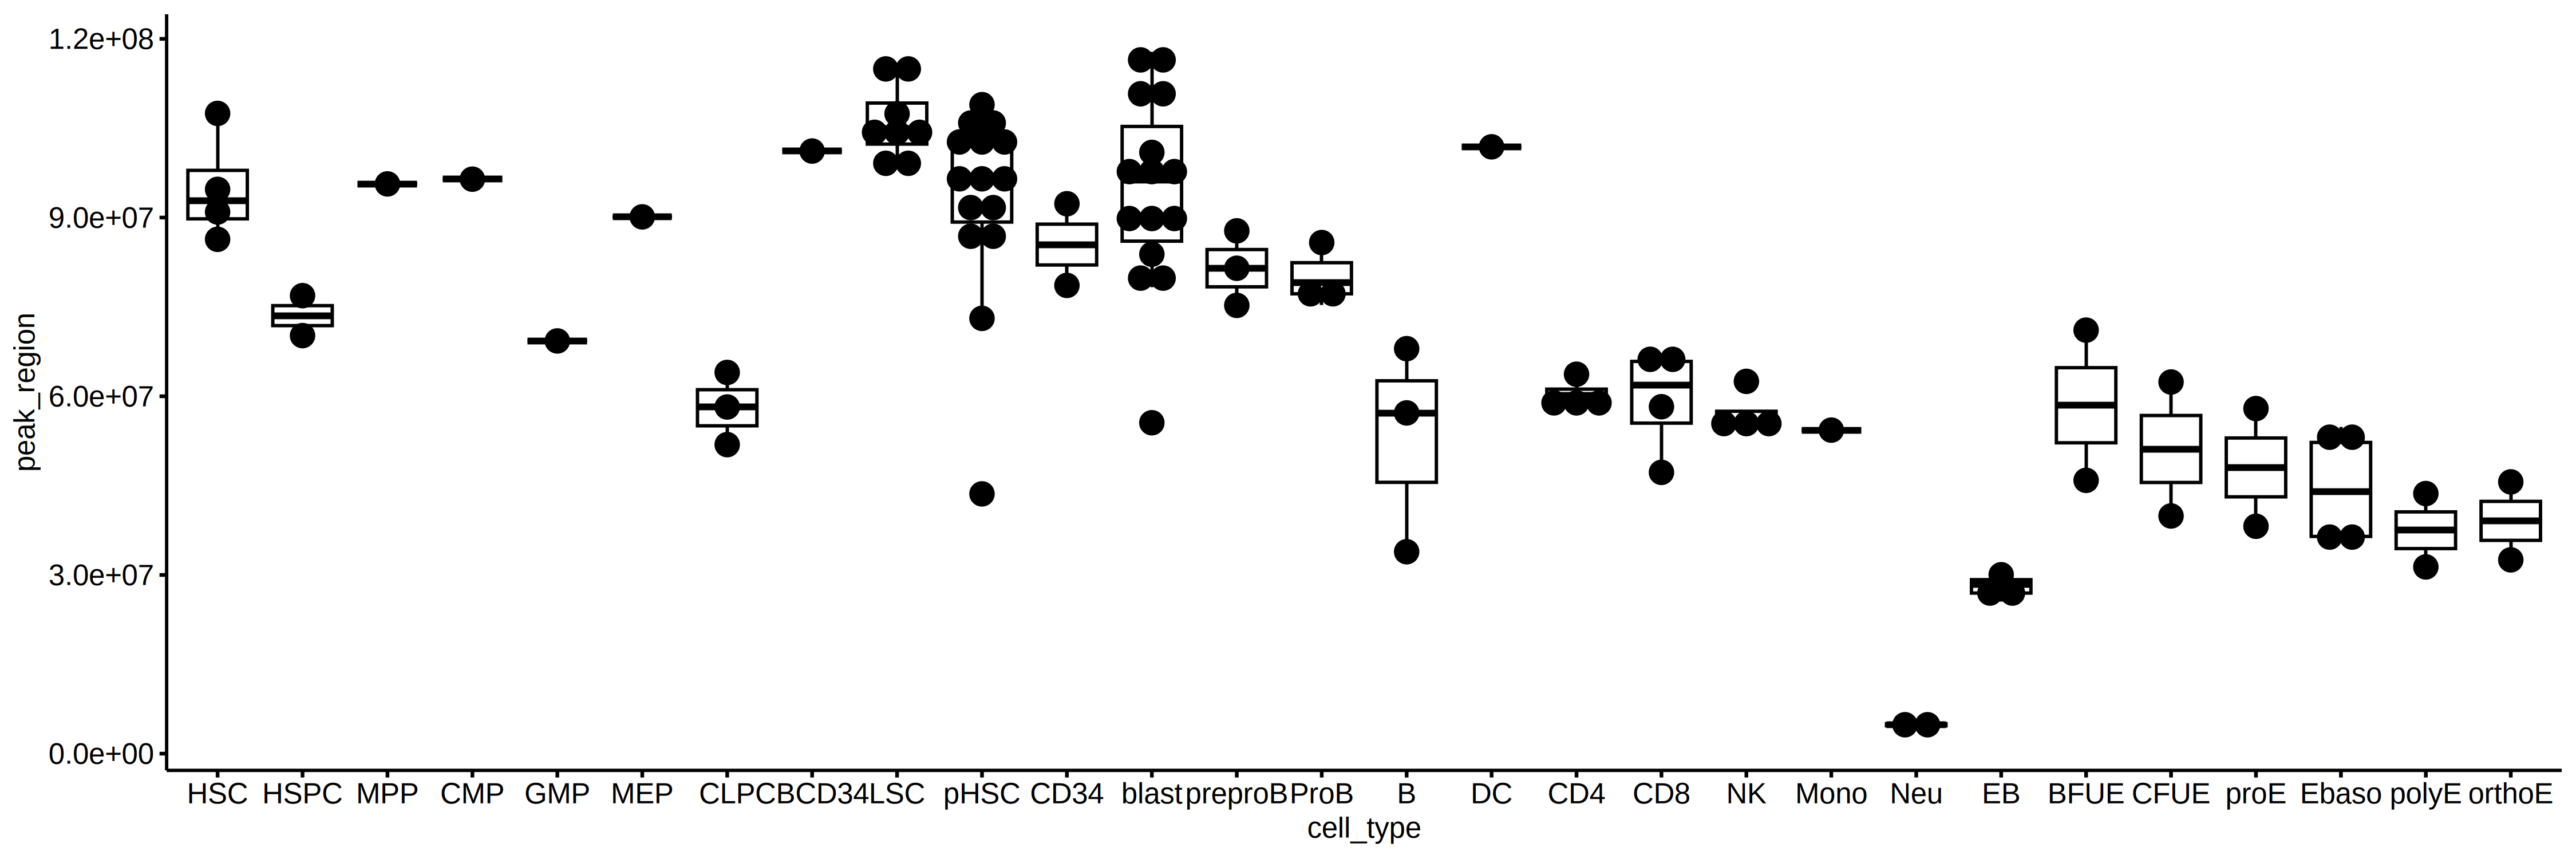

In [214]:
options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 300)
ggboxplot(sum_dt, x = 'cell_type', y = 'peak_region', add = 'dotplot', outlier.shape = NA)


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


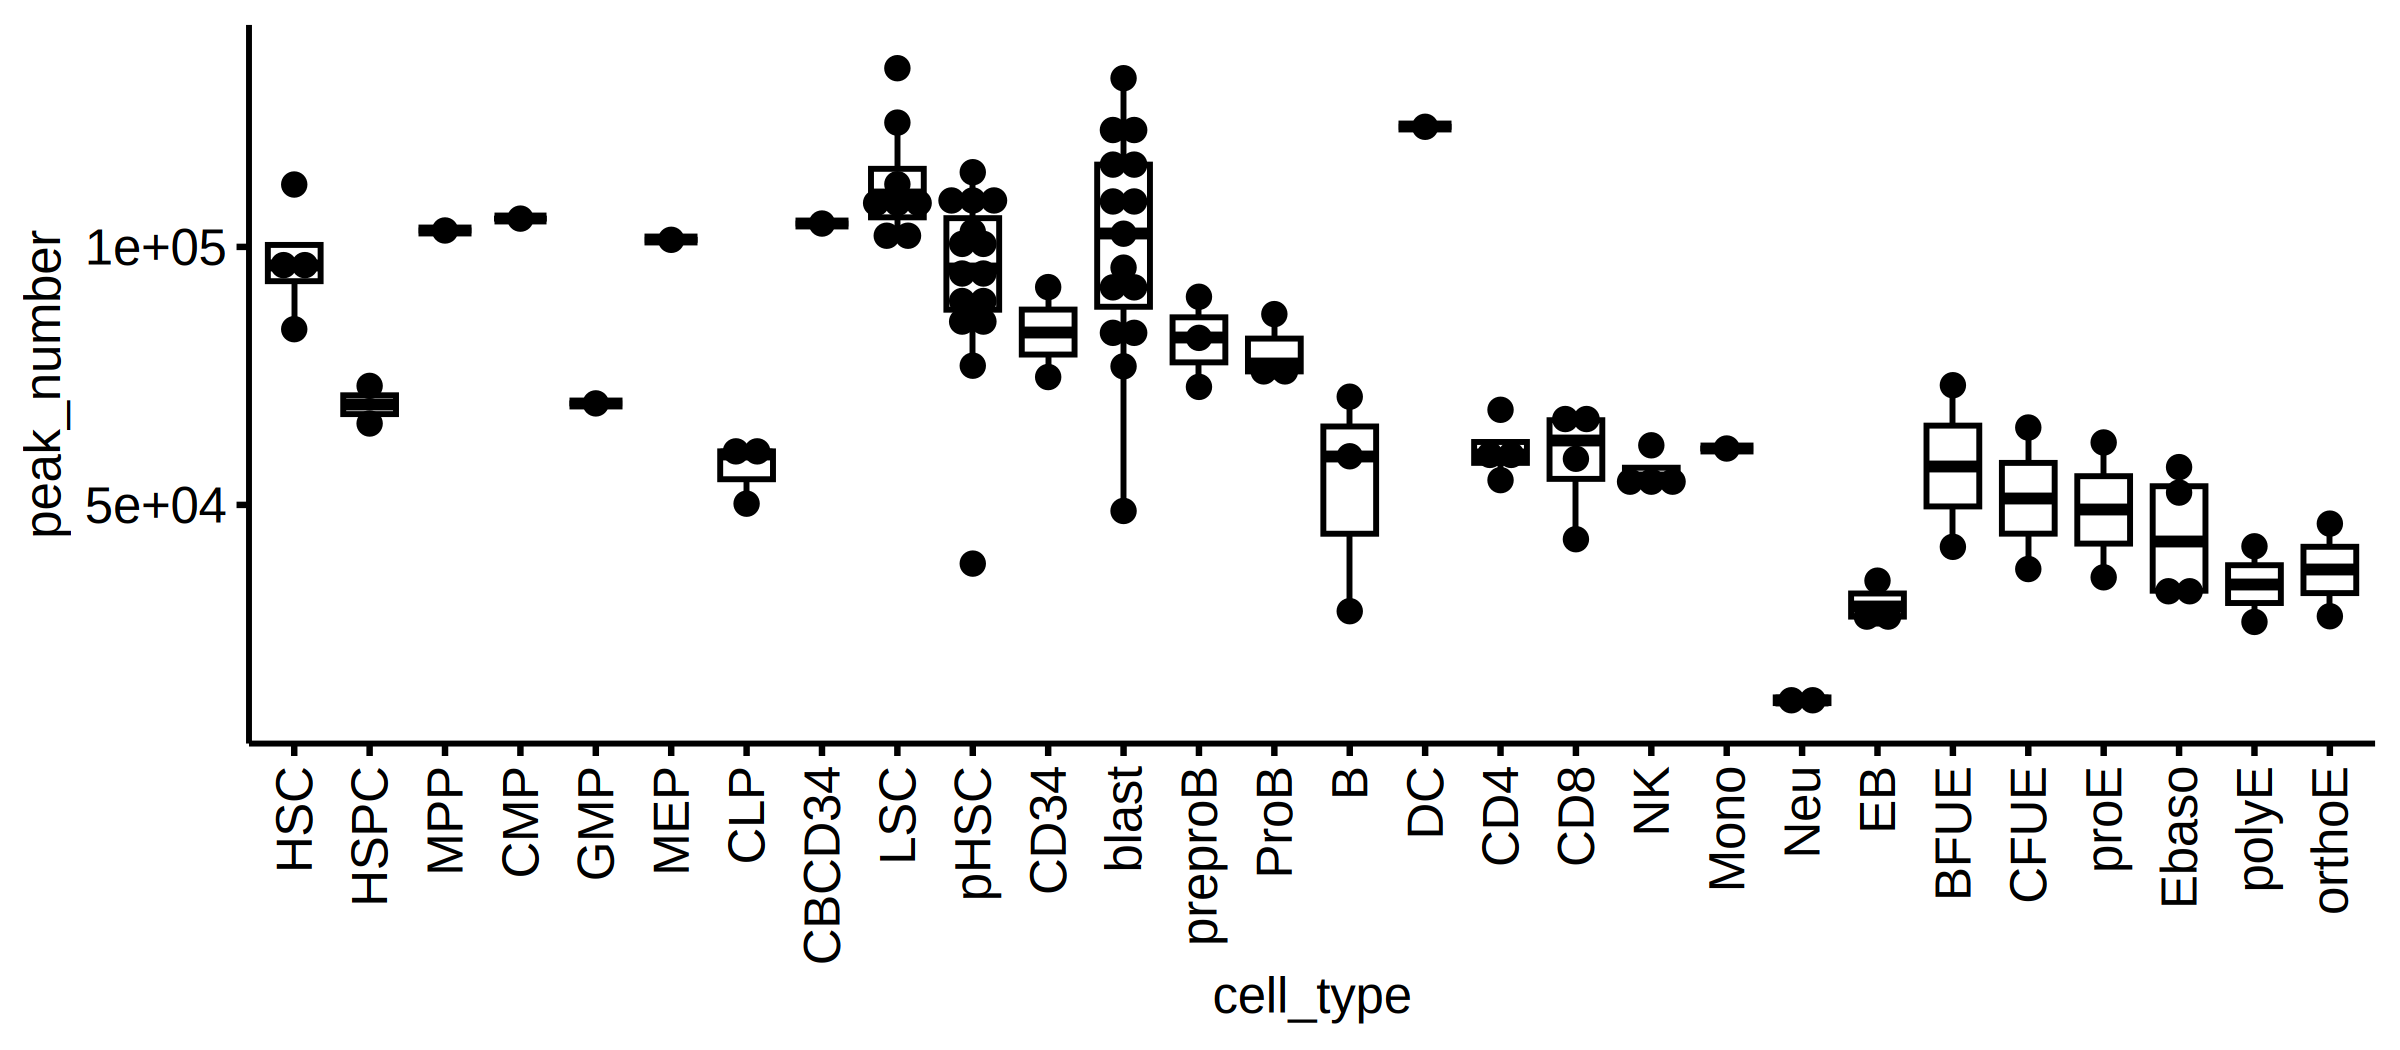

In [245]:
options(repr.plot.width = 8, repr.plot.height = 3.5, repr.plot.res = 300)
ggboxplot(sum_dt, x = 'cell_type', y = 'peak_number', add = 'dotplot', outlier.shape = NA) + 
theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1))


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


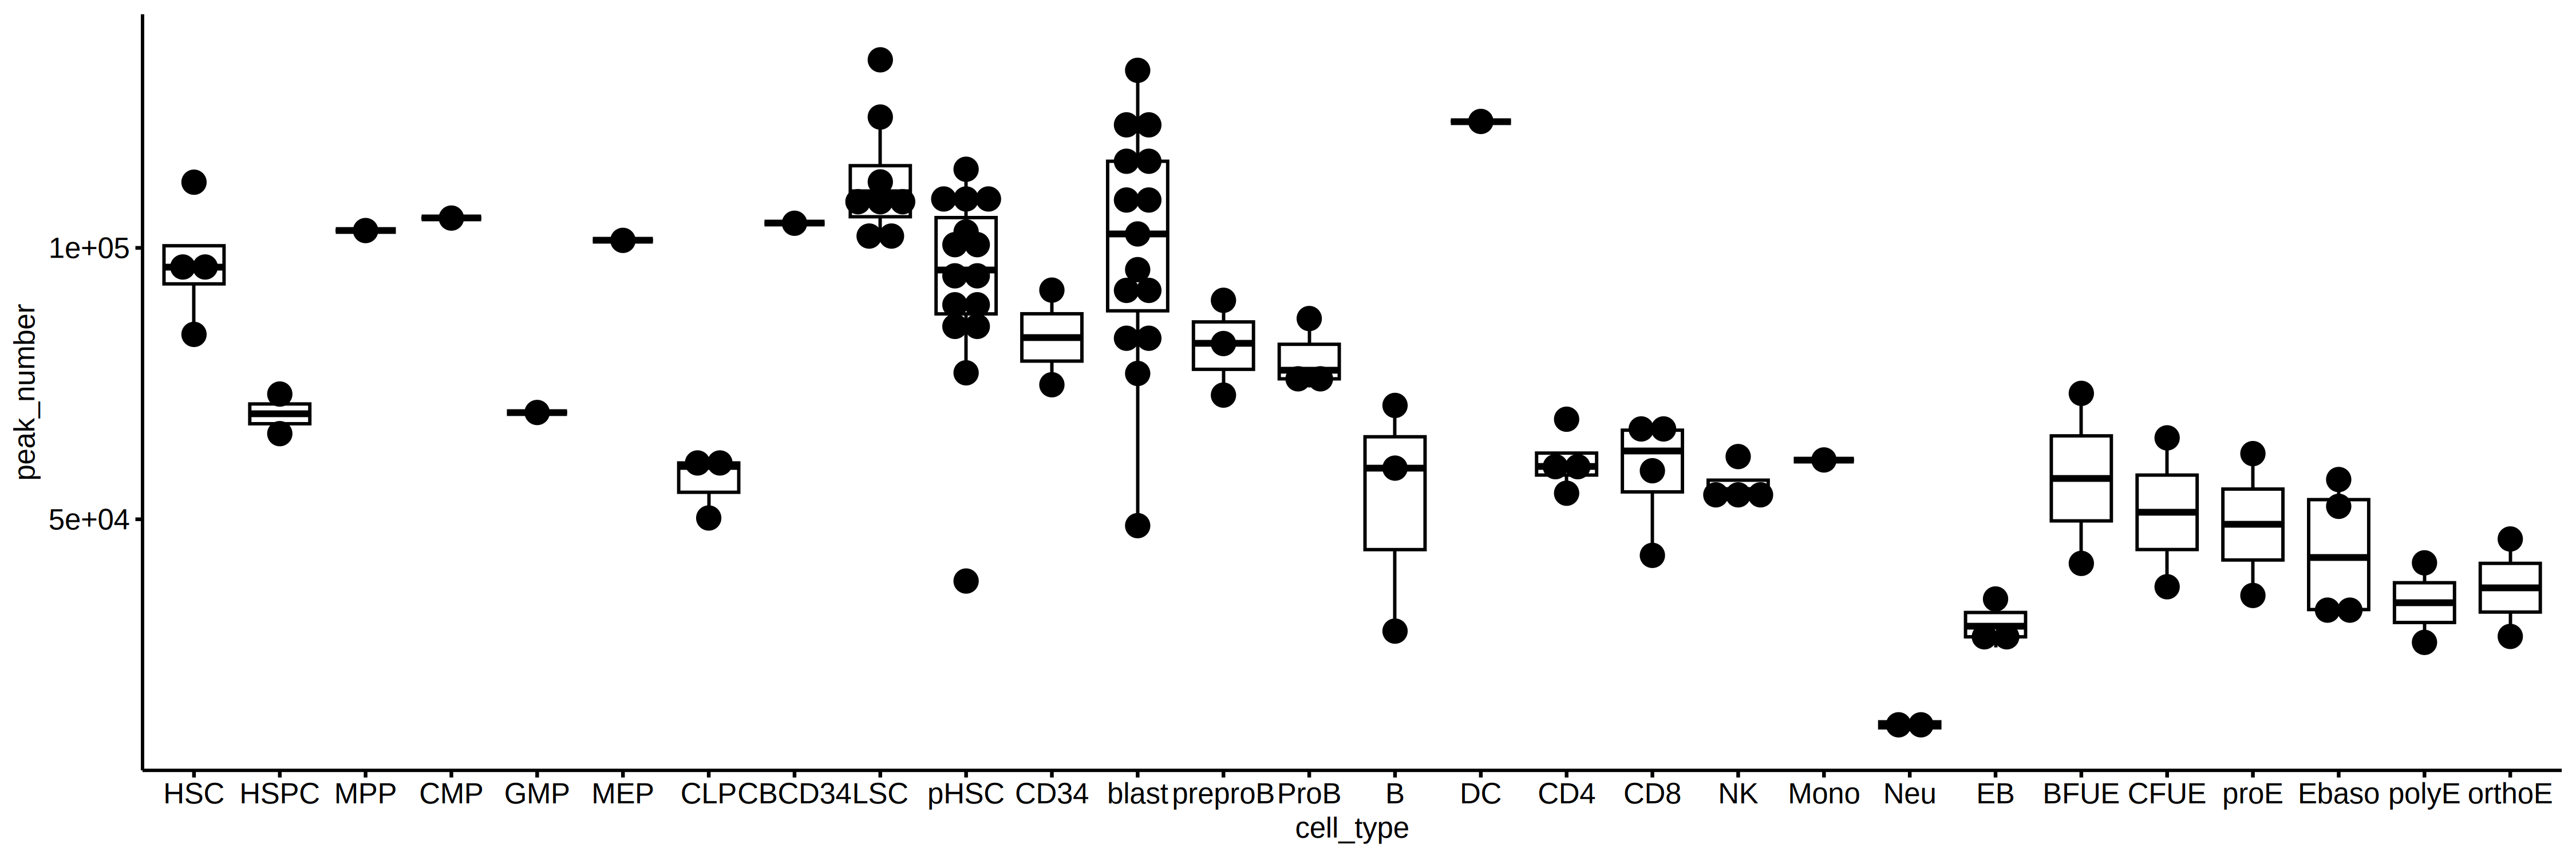

In [217]:
options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 300)
ggboxplot(sum_dt, x = 'cell_type', y = 'peak_number', add = 'dotplot', outlier.shape = NA)


In [451]:
head(sum_dt)

peak_region,peak_number,rn,cell_type,peak_region_per_1m
<int>,<int>,<chr>,<fct>,<dbl>
86342288,84057,HSC_1,HSC,297675.0
94731157,96484,HSC_2,HSC,326596.6
78606119,74782,CD34_1,CD34,271003.6
92317759,92214,CD34_2,CD34,318276.1
101162578,104532,CBCD34_1,CBCD34,348769.6
33899220,29398,B_1,B,116871.5


In [583]:
length(rn_sel)

[1] 9153

# if DEG telocal in CMP assocciated with chromosome status

In [283]:
deg_telocal_MEPCMP = fread(file = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/deg_telocal_MEPCMP_15Jul.tsv', header = T)
deg_MEPCMP = fread(file = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/deg_MEPCMP15Jul.tsv', header = T)
#logcpm_CMP = read.table(file = 'data/logcpm_CMP_15Jul.tsv')
#logcpm_MEP = read.table(file = 'data/logcpm_MEP_15Jul.tsv')
#logcpm_telocal_CMP = read.table(file = 'data/logcpm_telocal_CMP_15Jul.tsv')
#logcpm_telocal_MEP = read.table(file = 'data/logcpm_telocal_MEP_15Jul.tsv')
#dsn_telocal = read.table('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan//data/dsn_telocal.tsv')


In [284]:
head(deg_telocal_MEPCMP)

.id,rn,logFC,logCPM,PValue,FDR,batch,target,class_id,family_id,gene_id,tx_id
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
deg_telocal_MEP_EB,MSTD_dup4711:MSTD:ERVL-MaLR:LTR,-15.14818,10.847784,2.234428e-10,6.451911e-06,MEP,EB,LTR,ERVL-MaLR,MSTD,MSTD_dup4711
deg_telocal_MEP_EB,L1ME3G_dup281:L1ME3G:L1:LINE,-13.22592,8.928775,2.035238e-08,1.122423e-04,MEP,EB,LINE,L1,L1ME3G,L1ME3G_dup281
deg_telocal_MEP_EB,L1MC5a_dup9954:L1MC5a:L1:LINE,-13.30574,9.008395,2.299462e-08,1.122423e-04,MEP,EB,LINE,L1,L1MC5a,L1MC5a_dup9954
deg_telocal_MEP_EB,LTR2_dup109:Harlequin-int:ERV1:LTR,-14.01686,9.717875,1.036616e-07,1.122423e-04,MEP,EB,LTR,ERV1,Harlequin-int,LTR2_dup109
deg_telocal_MEP_EB,L1PA10_dup901:L1PA10:L1:LINE,-12.41123,8.117376,1.454230e-07,1.122423e-04,MEP,EB,LINE,L1,L1PA10,L1PA10_dup901
deg_telocal_MEP_EB,L1MA4A_dup1872:L1MA4A:L1:LINE,-11.91200,7.621480,3.271400e-07,1.122423e-04,MEP,EB,LINE,L1,L1MA4A,L1MA4A_dup1872


In [238]:
head(te_dt)
setkey(te_dt, 'idd')

chr,rmsk,exon,start,end,width,strand,score,gene_id,transcript_id,family_id,class_id,idd,idd_2
<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,UCSC_rmsk,exon,2710,4402,5119,-,.,TAR1,TAR1_dup164,subtelo,Satellite,TAR1_dup164:TAR1:subtelo:Satellite,chr1_2710_4402__TAR1_dup164:TAR1:subtelo:Satellite
chr1,UCSC_rmsk,exon,4083,4533,962,-,.,LTR60B,LTR60B_dup190,ERV1,LTR,LTR60B_dup190:LTR60B:ERV1:LTR,chr1_4083_4533__LTR60B_dup190:LTR60B:ERV1:LTR
chr1,UCSC_rmsk,exon,4534,4660,505,-,.,LTR60B,LTR60B_dup191,ERV1,LTR,LTR60B_dup191:LTR60B:ERV1:LTR,chr1_4534_4660__LTR60B_dup191:LTR60B:ERV1:LTR
chr1,UCSC_rmsk,exon,4664,5263,1304,+,.,L1MC3,L1MC3_dup5932,L1,LINE,L1MC3_dup5932:L1MC3:L1:LINE,chr1_4664_5263__L1MC3_dup5932:L1MC3:L1:LINE
chr1,UCSC_rmsk,exon,5275,5528,1403,+,.,MER34C_v,MER34C_v_dup375,ERV1,LTR,MER34C_v_dup375:MER34C_v:ERV1:LTR,chr1_5275_5528__MER34C_v_dup375:MER34C_v:ERV1:LTR
chr1,UCSC_rmsk,exon,5529,5686,3544,+,.,L1MC3,L1MC3_dup5932,L1,LINE,L1MC3_dup5932:L1MC3:L1:LINE,chr1_5529_5686__L1MC3_dup5932:L1MC3:L1:LINE


In [584]:
rn_sel = deg_telocal_MEPCMP[batch == 'CMP' & logFC < -1 & FDR < 0.05 & class_id %in% class_id_sel, rn]
length(rn_sel)


[1] 9153

In [586]:
findOverlapByTE = function(class_id_sel = NULL, if_include_TE = T, ext = 10000, te_list = NULL, var_name = NULL, sum_res = NULL, if_nPeaks = F){
    if(is.null(var_name)){
        var_name = paste0('mean_peak_iTE')
    }
    if(is.null(class_id_sel)){
        class_id_sel = c('LTR', 'LINE', 'SINE', 'DNA')
    }else{
        var_name = paste0(var_name, '_', class_id_sel)
    }
    if(ext >= 1000){
        var_name = paste0(var_name, '_', round(ext/1000, 2), 'kb')
    }else{
        var_name = paste0(var_name, '_', ext, 'b')
    }
    if(if_include_TE == F){ var_name = sub('iTE', 'eTE', var_name) }
    if(!is.null(te_list)){ var_name = sub('TE_', 'TE_DEG_', var_name) }
    if(if_nPeaks == T){var_name = paste0(var_name, '_nPeaks')}
    print(var_name)

    te_dt_sel = te_dt[class_id %in% class_id_sel, .(chr, start, end, strand, idd, class_id)]
    if(!is.null(class_id_sel)){
        te_dt_sel = te_dt_sel[class_id %in% class_id_sel,]
    }
    if(!is.null(te_list)){
        te_dt_sel = te_dt_sel[idd %in% te_list, ]
    }
    te_dt_sel[, start_ori := start ]
    te_dt_sel[, end_ori := end ]
    if(if_include_TE == T){
        te_dt_sel[, start := ifelse(start_ori - ext > 0, start_ori - ext, 1)]
        te_dt_sel[, end   := end_ori + ext]
        tmp = te_dt_sel[, .(chr, start, end, strand)]
        te_sel_gr = makeGRangesFromDataFrame(tmp, keep.extra.columns = F)
        atac_sel_gr = lapply(atac_peaks, subsetByOverlaps, te_sel_gr) 
        #print(lapply(atac_sel_gr, length))
        te_sel_region = sum(tmp$end - tmp$start)
        if(if_nPeaks == T){
            res = unlist(lapply(atac_sel_gr, function(gr){1000000 * length(gr) / te_sel_region})) 
        }else{
            res = unlist(lapply(atac_sel_gr, function(gr){1000000 * sum(end(gr) - start(gr)) / te_sel_region})) 
        }
        sum_res$xxx = res[sum_res$rn]
        sum_res = as.data.table(sum_res)
        setnames(sum_res, 'xxx', var_name)
        message(var_name)
        message('te_dt region width:', te_sel_region) 
        sum_res
    }else{
        # up stream of TE
        te_dt_sel[, start := ifelse(strand == '+', start_ori - ext, end_ori) ]
        te_dt_sel[, end   := ifelse(strand == '+', start_ori, end_ori + ext) ]
        tmp = te_dt_sel[, .(chr, start, end, strand)]
        te_sel_gr = makeGRangesFromDataFrame(tmp, keep.extra.columns = F)
        atac_sel_gr = lapply(atac_peaks, subsetByOverlaps, te_sel_gr) 
        #print(lapply(atac_sel_gr, length))
        te_sel_region = sum(tmp$end - tmp$start)
        if(if_nPeaks == T){
            res = unlist(lapply(atac_sel_gr, function(gr){1000000 * length(gr) / te_sel_region})) 
        }else{
            res = unlist(lapply(atac_sel_gr, function(gr){1000000 * sum(end(gr) - start(gr)) / te_sel_region})) 
        }
        sum_res$xxx = res[sum_res$rn]
        sum_res = as.data.table(sum_res)
        var_name = paste0(var_name, '_up')
        setnames(sum_res, 'xxx', var_name)

        # down stream of TE
        te_dt_sel[, start := ifelse(strand == '+', end_ori, start_ori - ext) ]
        te_dt_sel[, end   := ifelse(strand == '+', end_ori + ext, start_ori) ]
        tmp = te_dt_sel[, .(chr, start, end, strand)]
        te_sel_gr = makeGRangesFromDataFrame(tmp, keep.extra.columns = F)
        atac_sel_gr = lapply(atac_peaks, subsetByOverlaps, te_sel_gr) 
        #print(lapply(atac_sel_gr, length))
        te_sel_region = sum(tmp$end - tmp$start)
        if(if_nPeaks == T){
            res = unlist(lapply(atac_sel_gr, function(gr){1000000 * length(gr) / te_sel_region})) 
        }else{
            res = unlist(lapply(atac_sel_gr, function(gr){1000000 * sum(end(gr) - start(gr)) / te_sel_region})) 
        }
        sum_res$xxx = res[sum_res$rn]
        sum_res = as.data.table(sum_res)
        var_name = paste0(var_name, '_dn')
        setnames(sum_res, 'xxx', var_name)
        sum_res
    }
}


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


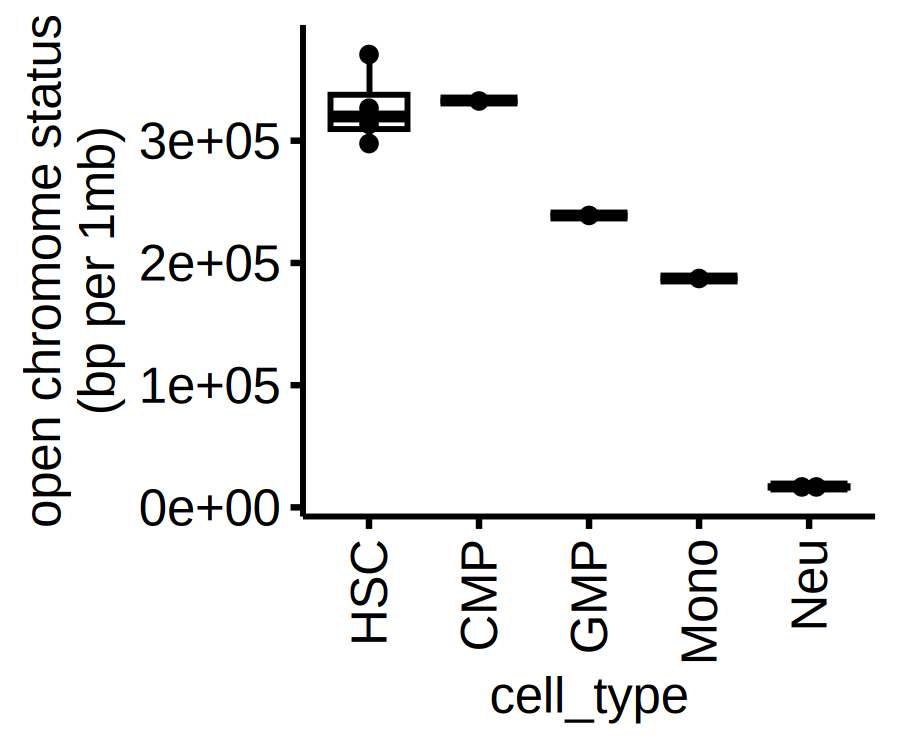

In [522]:
options(repr.plot.width = 3, repr.plot.height = 2.5, repr.plot.res = 300)
plotdat = sum_dt[cell_type %in% cell_type_mye_sel, .(rn, cell_type, peak_region_per_1m)]
plotdat[, `Whole genome` := peak_region_per_1m]
ggboxplot(plotdat, x = 'cell_type', y = 'Whole genome', add = 'dotplot', outlier.shape = NA) + 
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)) +
 ylab('open chromome status\n(bp per 1mb)')


In [565]:
ext = 1
class_id_sel = c('LTR', 'LINE', 'SINE', 'DNA')
te_dt_sel = te_dt[class_id %in% class_id_sel, .(chr, start, end, strand, idd, class_id)]
te_dt_sel[, start_ori := start ]
te_dt_sel[, end_ori := end ]
te_dt_sel[, start := ifelse(start_ori - ext > 0, start_ori - ext, 1)]
te_dt_sel[, end   := end_ori + ext]
te_dt_sel = te_dt_sel[idd %in% rn_sel, ]
tmp = te_dt_sel[, .(chr, start, end, strand)]
te_sel_gr = makeGRangesFromDataFrame(tmp, keep.extra.columns = F)
dim(te_dt_sel)
atac_sel_gr = lapply(atac_peaks, subsetByOverlaps, te_sel_gr) 


[1] 26429     8

In [566]:
sum_dt$DEG_TE_1b_nPeak = unlist(lapply(atac_sel_gr, length))[sum_dt$rn]
sum_dt$DEG_TE_1b_nPeak

[1] 253 314 208 267 352  83 222 147 202 391 297 211 434 331 277 381 431 426 241 386 297 299 269 289 235 242 234 125 200 203  73 375 125 325 302 401 264 315 433  90
[41] 578 375 451 332 394 253 452 435 268 224 453 336 328 294 389 603 291 412 303 478 500 319 243 375 209 359 378 516 431 368  70  63 446 309 284 254 194 269 243 248
[81] 199 201 124 280 235 122 117 191  87 184  80 144  78 136  70 143

In [588]:
sum_dt = findOverlapByTE(sum_res = sum_dt, ext = 1, if_nPeaks = T )
sum_dt = findOverlapByTE(sum_res = sum_dt, ext = 10000, if_nPeaks = T)
sum_dt = findOverlapByTE(sum_res = sum_dt, ext = 100000, if_nPeaks = T)


[1] "mean_peak_iTE_1b_nPeaks"
[1] "mean_peak_iTE_1b_nPeaks"
[1] "mean_peak_iTE_10kb_nPeaks"
[1] "mean_peak_iTE_10kb_nPeaks"
[1] "mean_peak_iTE_100kb_nPeaks"
[1] "mean_peak_iTE_100kb_nPeaks"


Warning message in melt.data.table(plotdat):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [rn, cell_type, ...]. Consider providing at least one of 'id' or 'measure' vars in future."
Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


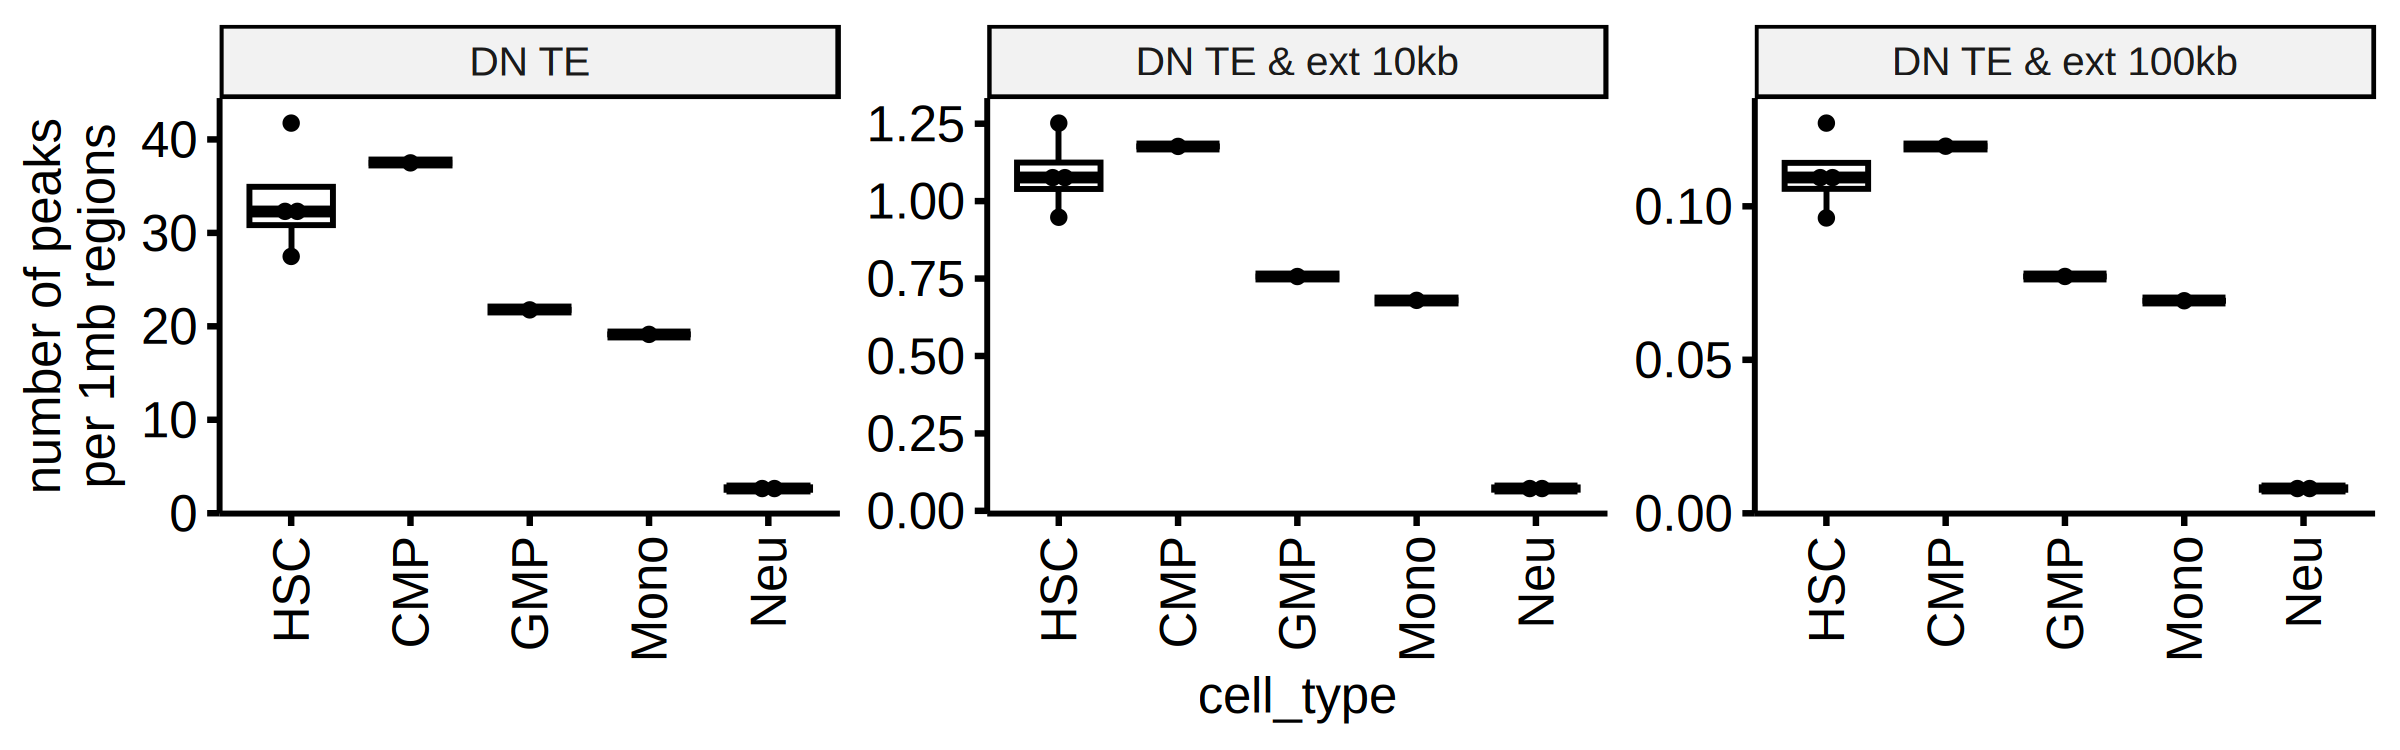

In [590]:
options(repr.plot.width = 8, repr.plot.height = 2.5, repr.plot.res = 300)
plotdat = sum_dt[cell_type %in% cell_type_mye_sel, .(rn, cell_type, mean_peak_iTE_1b_nPeaks, mean_peak_iTE_10kb_nPeaks, mean_peak_iTE_100kb_nPeaks)]
plotdat = melt(plotdat) 
plotdat[, regions := '']
plotdat[variable == 'mean_peak_iTE_100kb_nPeaks', regions := 'DN TE & ext 100kb']
plotdat[variable == 'mean_peak_iTE_10kb_nPeaks', regions := 'DN TE & ext 10kb']
plotdat[variable == 'mean_peak_iTE_1b_nPeaks', regions := 'DN TE']
plotdat[, regions := factor(regions, levels = c('DN TE', 'DN TE & ext 10kb', 'DN TE & ext 100kb'))]
ggboxplot(plotdat, x = 'cell_type', y = 'value', add = 'dotplot', outlier.shape = NA) + 
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)) + facet_wrap(~ regions, nrow = 1, scale = 'free') +
 ylab('number of peaks\nper 1mb regions')


Warning message in melt.data.table(plotdat):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [rn, cell_type, ...]. Consider providing at least one of 'id' or 'measure' vars in future."
Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


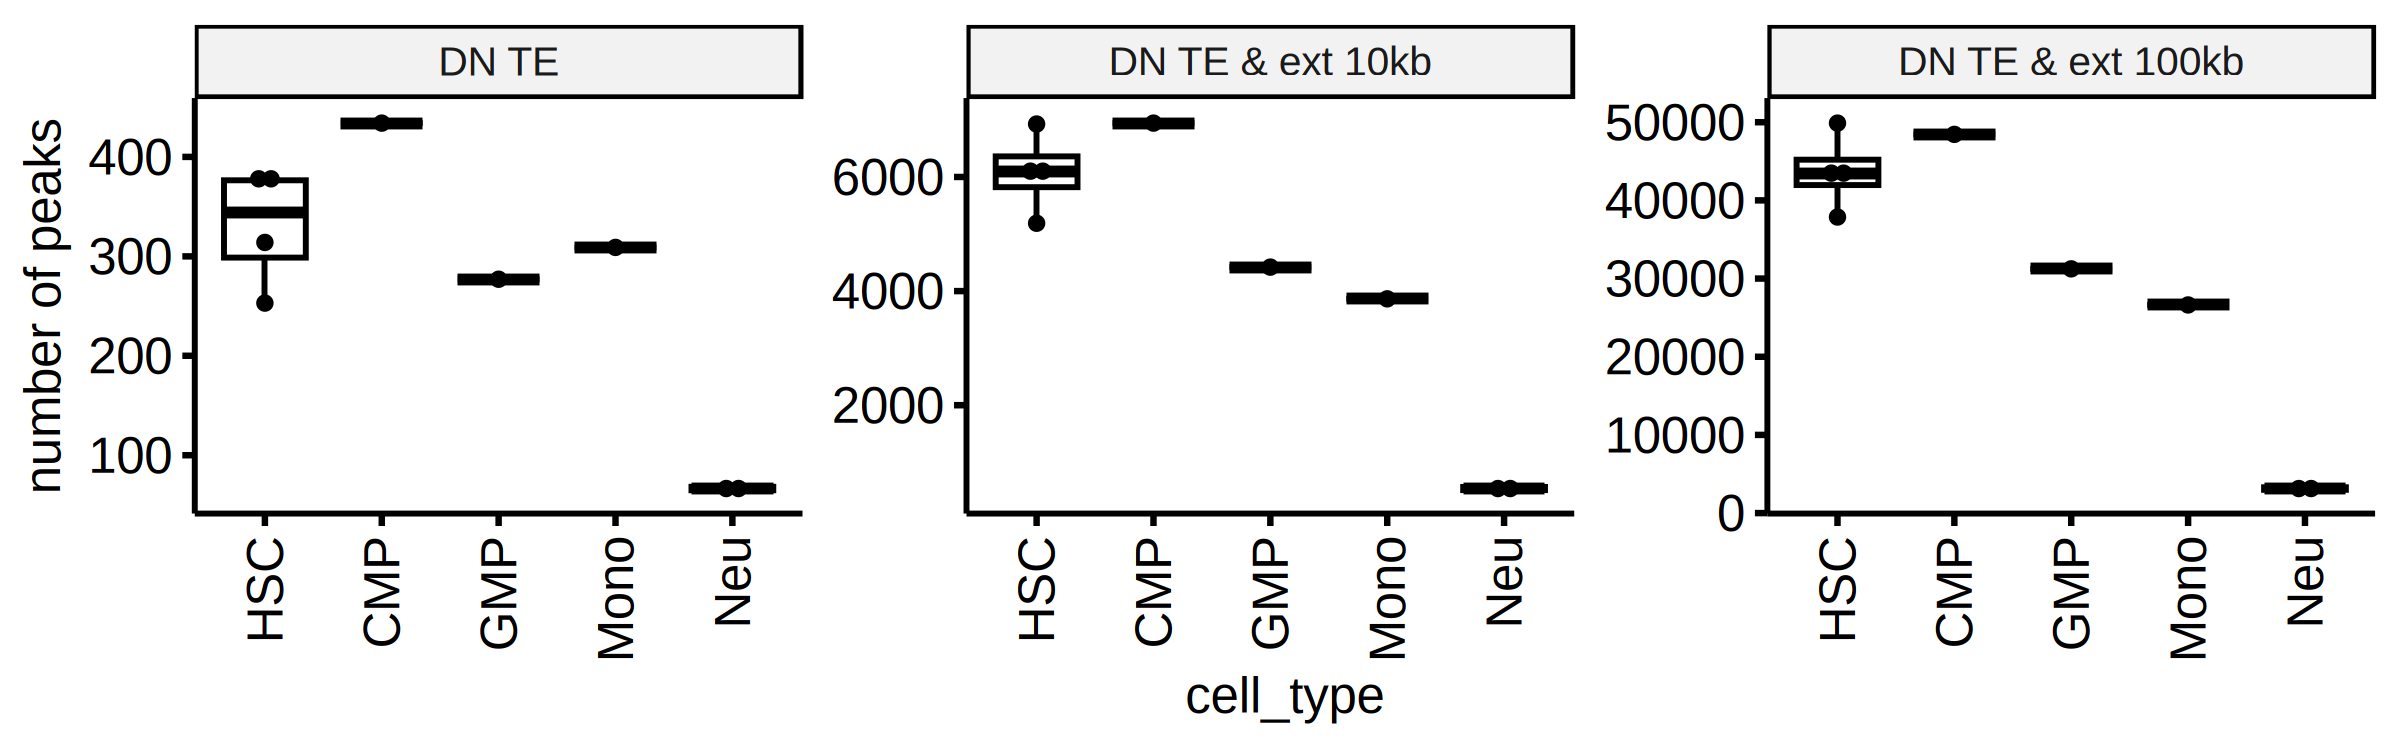

In [576]:
options(repr.plot.width = 8, repr.plot.height = 2.5, repr.plot.res = 300)
plotdat = sum_dt[cell_type %in% cell_type_mye_sel, .(rn, cell_type, DEG_TE_100kb_nPeak, DEG_TE_10kb_nPeak, DEG_TE_1b_nPeak)]
plotdat = melt(plotdat) 
plotdat[, regions := '']
plotdat[variable == 'DEG_TE_100kb_nPeak', regions := 'DN TE & ext 100kb']
plotdat[variable == 'DEG_TE_10kb_nPeak', regions := 'DN TE & ext 10kb']
plotdat[variable == 'DEG_TE_1b_nPeak', regions := 'DN TE']
plotdat[, regions := factor(regions, levels = c('DN TE', 'DN TE & ext 10kb', 'DN TE & ext 100kb'))]
ggboxplot(plotdat, x = 'cell_type', y = 'value', add = 'dotplot', outlier.shape = NA) + 
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)) + facet_wrap(~ regions, nrow = 1, scale = 'free') +
 ylab('number of peaks')


In [533]:
sum_dt = findOverlapByTE(sum_res = sum_dt) 
sum_dt = findOverlapByTE(sum_res = sum_dt, ext = 1) 
sum_dt = findOverlapByTE(sum_res = sum_dt, ext = 10000 )
sum_dt = findOverlapByTE(sum_res = sum_dt, ext = 100000 )
sum_dt = findOverlapByTE(sum_res = sum_dt, ext = 1000000 )


[1] "mean_peak_iTE_10kb"
[1] "mean_peak_iTE_1b"
[1] "mean_peak_iTE_10kb"
[1] "mean_peak_iTE_100kb"


In [538]:
sum_dt = findOverlapByTE(sum_res = sum_dt, ext = 1000000 )


[1] "mean_peak_iTE_1000kb"


Warning message in melt.data.table(plotdat):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [rn, cell_type, ...]. Consider providing at least one of 'id' or 'measure' vars in future."
Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


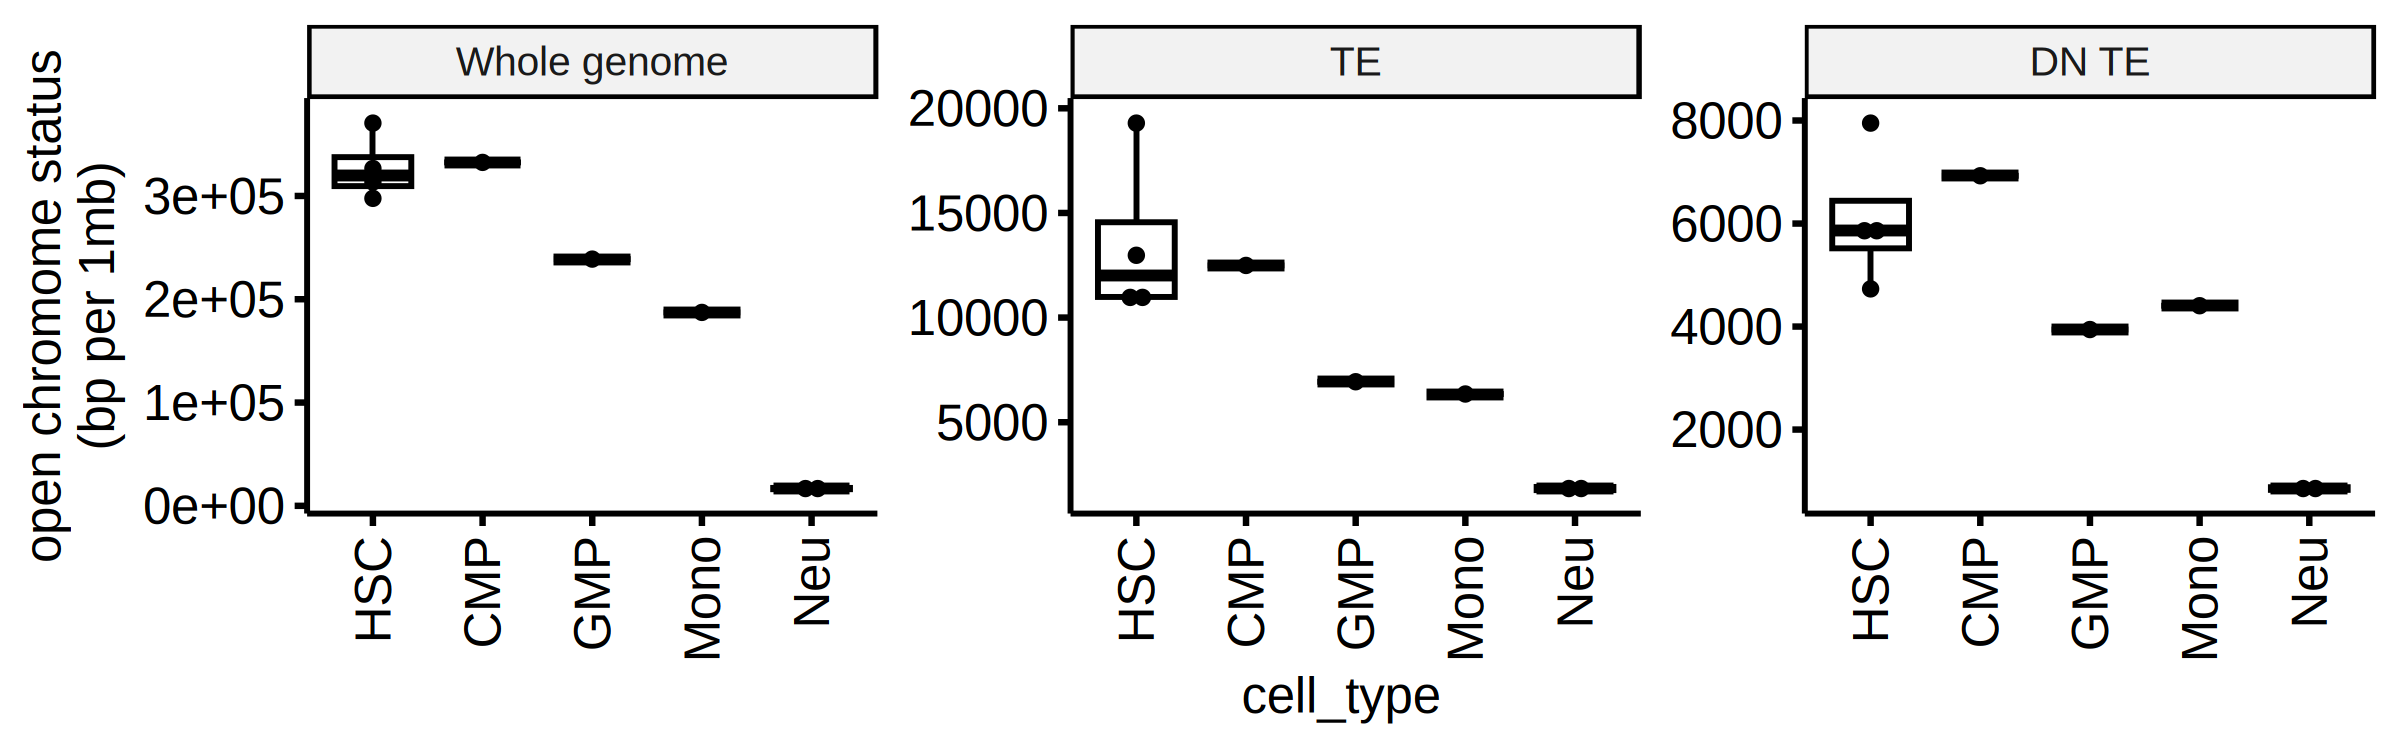

In [537]:
options(repr.plot.width = 8, repr.plot.height = 2.5, repr.plot.res = 300)
plotdat = sum_dt[cell_type %in% cell_type_mye_sel, .(rn, cell_type, peak_region_per_1m, mean_peak_iTE_1b, mean_peak_iTE_DEG_1b)]
plotdat = melt(plotdat) 
plotdat[, regions := 'Whole genome']
plotdat[variable == 'mean_peak_iTE_DEG_100kb', regions := 'DN TE & ext 100kb']
plotdat[variable == 'mean_peak_iTE_DEG_10kb', regions := 'DN TE & ext 10kb']
plotdat[variable == 'mean_peak_iTE_DEG_1b', regions := 'DN TE']
plotdat[variable == 'mean_peak_iTE_100kb', regions := 'TE & ext 100kb']
plotdat[variable == 'mean_peak_iTE_10kb', regions := 'TE & ext 10kb']
plotdat[variable == 'mean_peak_iTE_1b', regions := 'TE']
plotdat[, regions := factor(regions, levels = c('Whole genome', 'TE', 'TE & ext 10kb', 'TE & ext 100kb', 'DN TE', 'DN TE & ext 10kb', 'DN TE & ext 100kb'))]
ggboxplot(plotdat, x = 'cell_type', y = 'value', add = 'dotplot', outlier.shape = NA) + 
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)) + facet_wrap(~ regions, nrow = 1, scale = 'free') +
 ylab('open chromome status\n(bp per 1mb)')


Warning message in melt.data.table(plotdat):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [rn, cell_type, ...]. Consider providing at least one of 'id' or 'measure' vars in future."
Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


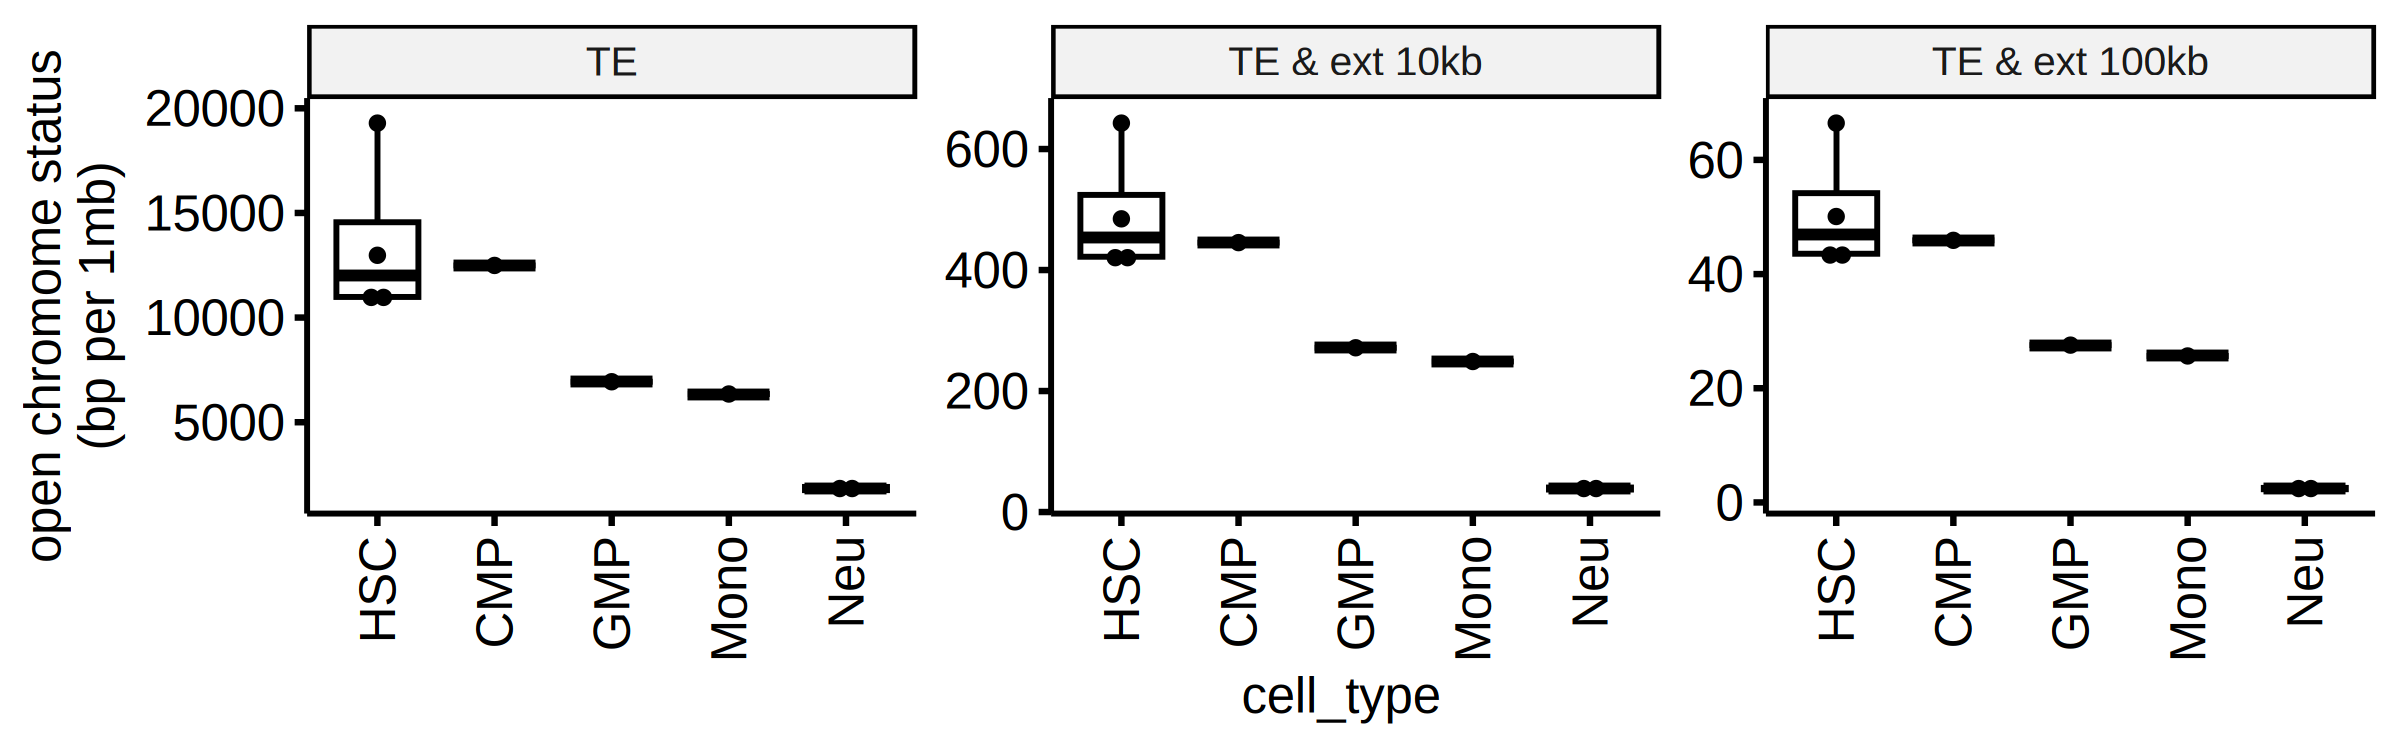

In [534]:
options(repr.plot.width = 8, repr.plot.height = 2.5, repr.plot.res = 300)
plotdat = sum_dt[cell_type %in% cell_type_mye_sel, .(rn, cell_type, mean_peak_iTE_1000kb, mean_peak_iTE_100kb, mean_peak_iTE_10kb, mean_peak_iTE_1b)]
plotdat = melt(plotdat) 
plotdat[, regions := 'Whole genome']
plotdat[variable == 'mean_peak_iTE_DEG_1000kb', regions := 'DN TE & ext 1mb']
plotdat[variable == 'mean_peak_iTE_DEG_100kb', regions := 'DN TE & ext 100kb']
plotdat[variable == 'mean_peak_iTE_DEG_10kb', regions := 'DN TE & ext 10kb']
plotdat[variable == 'mean_peak_iTE_DEG_1b', regions := 'DN TE']
plotdat[variable == 'mean_peak_iTE_100kb', regions := 'TE & ext 100kb']
plotdat[variable == 'mean_peak_iTE_10kb', regions := 'TE & ext 10kb']
plotdat[variable == 'mean_peak_iTE_1b', regions := 'TE']
plotdat[, regions := factor(regions, levels = c('Whole genome', 'TE', 'TE & ext 10kb', 'TE & ext 100kb', 'DN TE', 'DN TE & ext 10kb', 'DN TE & ext 100kb'))]
ggboxplot(plotdat, x = 'cell_type', y = 'value', add = 'dotplot', outlier.shape = NA) + 
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)) + facet_wrap(~ regions, nrow = 1, scale = 'free') +
 ylab('open chromome status\n(bp per 1mb)')


In [535]:
sum_dt = findOverlapByTE(te_list = rn_sel, sum_res = sum_dt) 
sum_dt = findOverlapByTE(te_list = rn_sel, sum_res = sum_dt, ext = 1) 
sum_dt = findOverlapByTE(te_list = rn_sel, sum_res = sum_dt, ext = 10000) 
sum_dt = findOverlapByTE(te_list = rn_sel, sum_res = sum_dt, ext = 100000) 


[1] "mean_peak_iTE_DEG_10kb"
[1] "mean_peak_iTE_DEG_1b"
[1] "mean_peak_iTE_DEG_10kb"
[1] "mean_peak_iTE_DEG_100kb"


Warning message in melt.data.table(plotdat):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [rn, cell_type, ...]. Consider providing at least one of 'id' or 'measure' vars in future."
Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


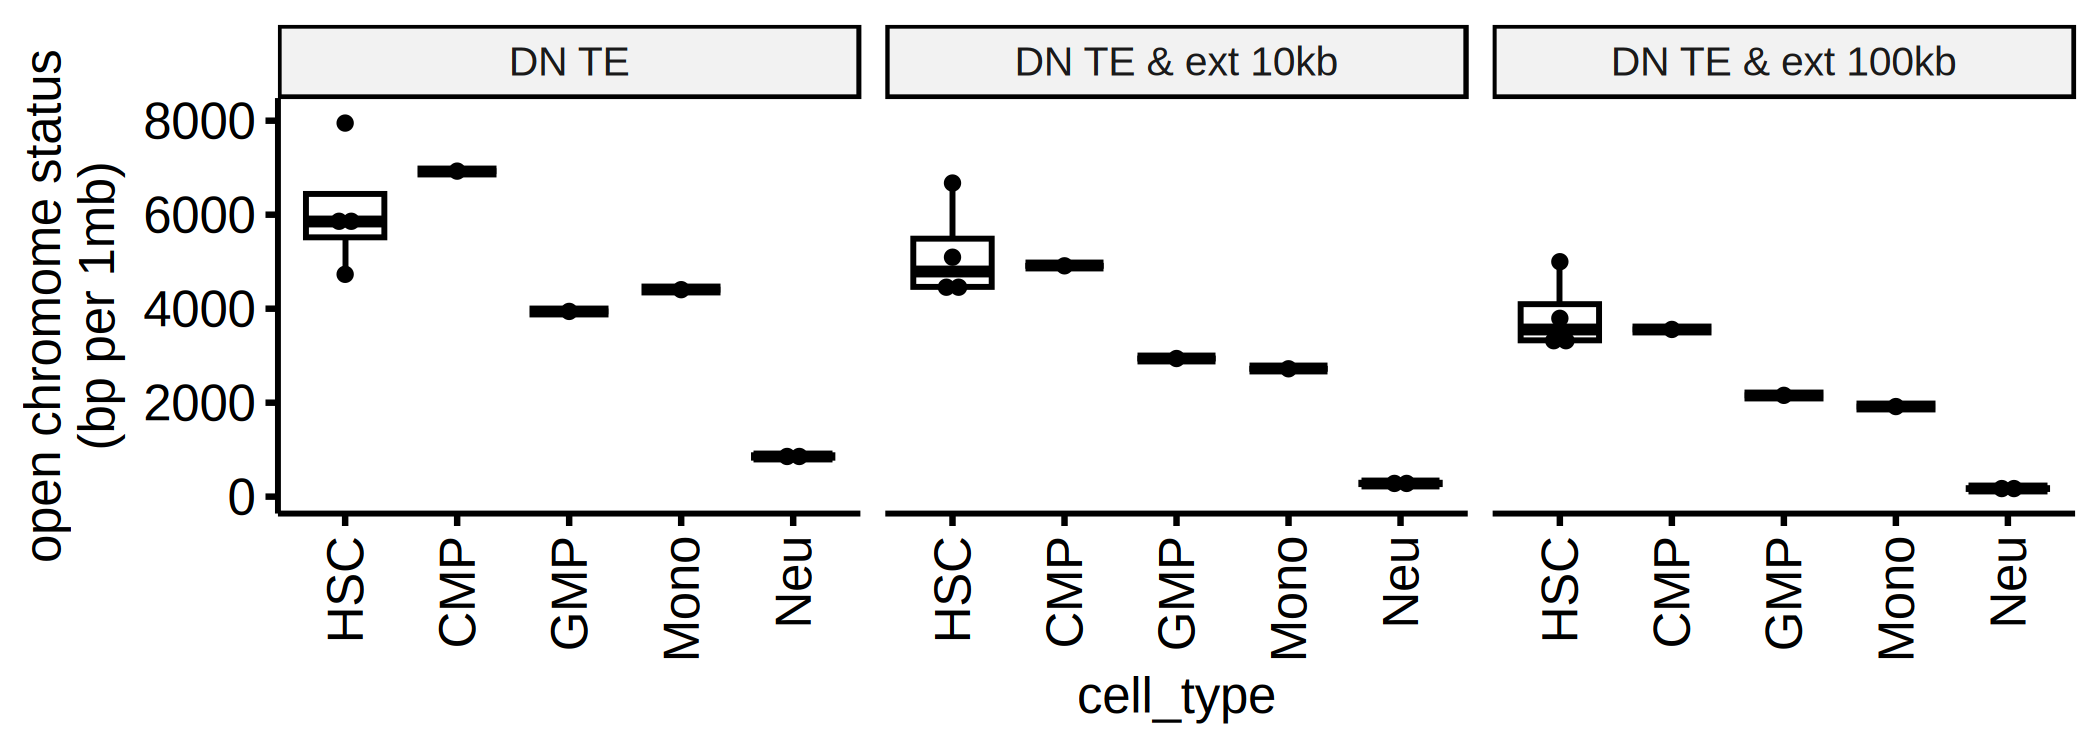

In [536]:
options(repr.plot.width = 7, repr.plot.height = 2.5, repr.plot.res = 300)
plotdat = sum_dt[cell_type %in% cell_type_mye_sel, .(rn, cell_type, mean_peak_iTE_DEG_100kb, mean_peak_iTE_DEG_10kb, mean_peak_iTE_DEG_1b)]
plotdat = melt(plotdat) 
plotdat[, regions := 'Whole genome']
plotdat[variable == 'mean_peak_iTE_DEG_100kb', regions := 'DN TE & ext 100kb']
plotdat[variable == 'mean_peak_iTE_DEG_10kb', regions := 'DN TE & ext 10kb']
plotdat[variable == 'mean_peak_iTE_DEG_1b', regions := 'DN TE']
plotdat[variable == 'mean_peak_iTE_100kb', regions := 'TE & ext 100kb']
plotdat[variable == 'mean_peak_iTE_10kb', regions := 'TE & ext 10kb']
plotdat[variable == 'mean_peak_iTE_1b', regions := 'TE']
plotdat[, regions := factor(regions, levels = c('Whole genome', 'TE', 'TE & ext 10kb', 'TE & ext 100kb', 'DN TE', 'DN TE & ext 10kb', 'DN TE & ext 100kb'))]
ggboxplot(plotdat, x = 'cell_type', y = 'value', add = 'dotplot', outlier.shape = NA) + 
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)) + facet_wrap(~ regions, nrow = 1) +
 ylab('open chromome status\n(bp per 1mb)')


In [464]:
sum_dt = findOverlapByTE(sum_res = sum_dt) 
sum_dt = findOverlapByTE(te_list = rn_sel, sum_res = sum_dt) 


[1] "mean_peak_iTE_DEG_10kb"


In [488]:
table(plotdat$regions)


Whole genome    TE & 10kb DN TE & 10kb 
           9           18            0 

In [487]:
head(plotdat)

rn,cell_type,variable,value,regions
<chr>,<fct>,<fct>,<dbl>,<fct>
HSC_1,HSC,peak_region_per_1m,297675.0,Whole genome
HSC_2,HSC,peak_region_per_1m,326596.6,Whole genome
CMP_1,CMP,peak_region_per_1m,332493.8,Whole genome
GMP_1,GMP,peak_region_per_1m,238873.5,Whole genome
HSC_3,HSC,peak_region_per_1m,313492.9,Whole genome
HSC_4,HSC,peak_region_per_1m,370551.4,Whole genome


Warning message in melt.data.table(plotdat):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [rn, cell_type]. Consider providing at least one of 'id' or 'measure' vars in future."
Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


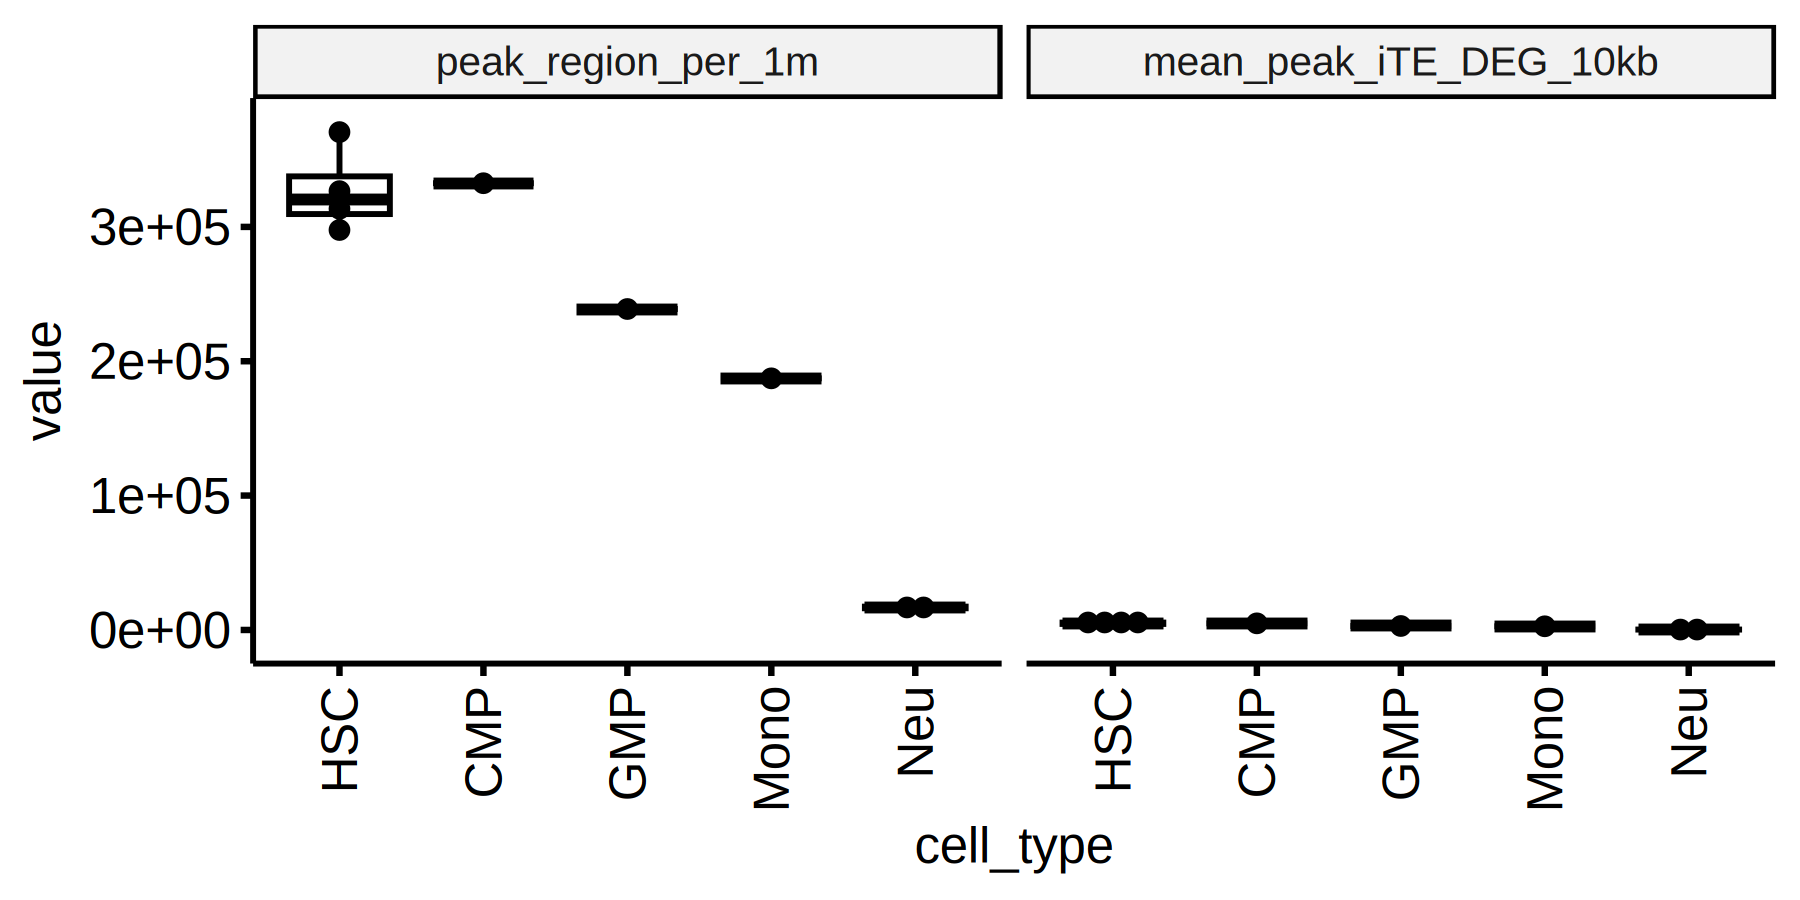

In [477]:
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 300)
plotdat = sum_dt[cell_type %in% cell_type_mye_sel, .(rn, cell_type, peak_region_per_1m, mean_peak_iTE_DEG_10kb)]
plotdat = melt(plotdat) 
ggboxplot(plotdat, x = 'cell_type', y = 'value', add = 'dotplot', outlier.shape = NA) + 
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)) + facet_wrap(~ variable, nrow = 1)


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.


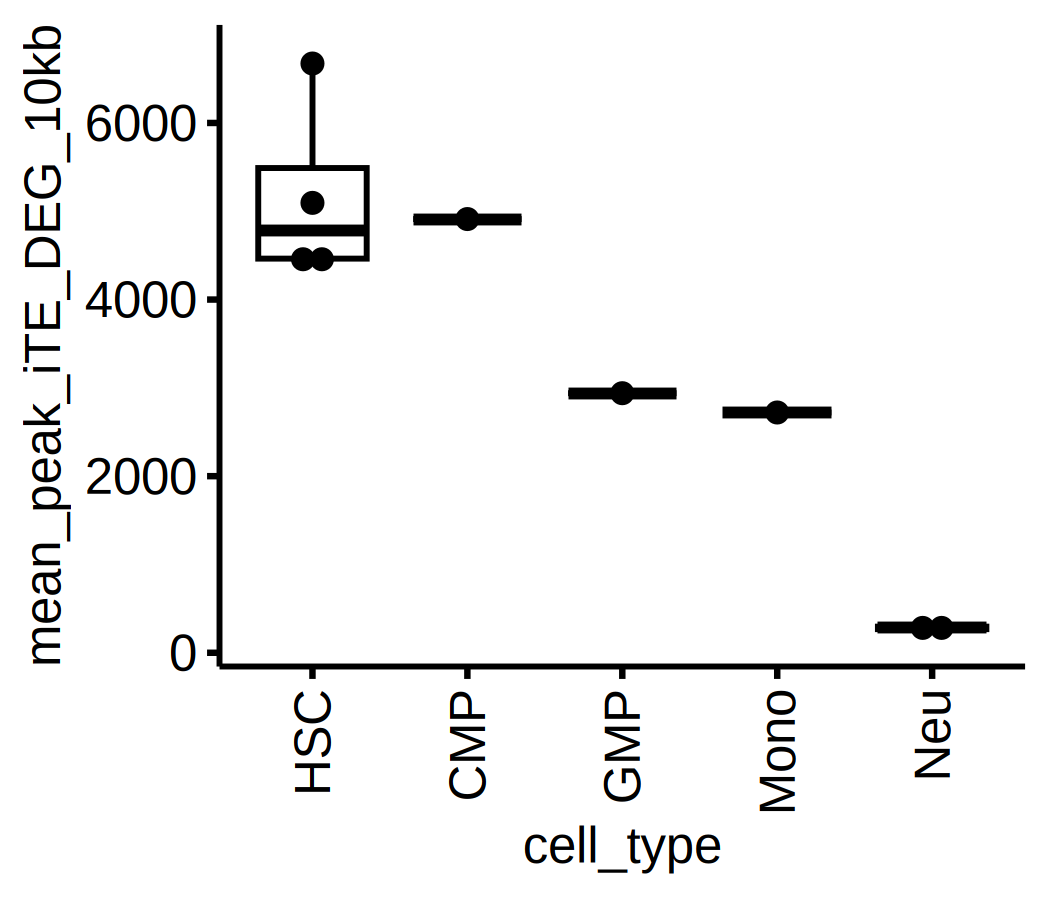

In [468]:
options(repr.plot.width = 3.5, repr.plot.height = 3, repr.plot.res = 300)
plotdat = sum_dt[cell_type %in% cell_type_mye_sel, .(rn, cell_type, peak_region, mean_peak_iTE_DEG_10kb)]
ggboxplot(plotdat, x = 'cell_type', y = 'mean_peak_iTE_DEG_10kb', add = 'dotplot', outlier.shape = NA) +
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1))


In [ ]:
options(repr.plot.width = 9, repr.plot.height = 3, repr.plot.res = 300)
plotdat = melt(sum_dt[cell_type %in% cell_type_mye_sel, .(cell_type, peak_region_per_1m, mean_peak_iTE_DEG_10kb, mean_peak_iTE_10kb)])
ggboxplot(plotdat, x = 'cell_type', y = 'value', add = 'dotplot', outlier.shape = NA) +
 theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1)) +
 facet_wrap(~ variable, nrow = 1, scale = 'free')


Warning message in melt.data.table(sum_dt[cell_type %in% cell_type_mye_sel, .(cell_type, :
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [cell_type]. Consider providing at least one of 'id' or 'measure' vars in future."


In [336]:
sum(end(tmp[[1]]) - start(tmp[[1]]))

[1] 2855074

In [332]:
sum(sum(coverage(tmp[[1]])))

[1] 2861293

In [432]:
sum_dt = findOverlapByTE(te_list = rn_sel, sum_res = sum_dt)
sum_dt = findOverlapByTE(sum_res = sum_dt)


In [433]:
head(sum_dt)

peak_region,peak_number,rn,cell_type,peak_region_per_10m,peak_region_per_1m,peak_region_DEG_iTE_10kb,peak_region_DEG_iTE_10kb_per_1m,mean_peak_iTE_DEG_10kb,mean_peak_iTE_10kb,mean_peak_iTE_DEG_10kb,mean_peak_iTE_DEG_10kb,mean_peak_iTE_10kb
<int>,<int>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
86342288,84057,HSC_1,HSC,297675.0,297675.0,90661.47,3755.394,3755.394,423.5106,3755.394,3755.394,423.5106
94731157,96484,HSC_2,HSC,326596.6,326596.6,104115.51,4312.689,4312.689,484.6332,4312.689,4312.689,484.6332
78606119,74782,CD34_1,CD34,271003.6,271003.6,65668.55,2720.133,2720.133,345.8575,2720.133,2720.133,345.8575
92317759,92214,CD34_2,CD34,318276.1,318276.1,84723.79,3509.442,3509.442,433.8027,3509.442,3509.442,433.8027
101162578,104532,CBCD34_1,CBCD34,348769.6,348769.6,109927.82,4553.447,4553.447,538.2864,4553.447,4553.447,538.2864
33899220,29398,B_1,B,116871.5,116871.5,27719.11,1148.185,1148.185,132.7854,1148.185,1148.185,132.7854


In [241]:
te_sel_gr = makeGRangesFromDataFrame(te_dt[rn_sel, .(chr, start, end, idd)])


In [ ]:
rn_sel, 

# CHIPSeq and ATACSeq design table

In [10]:
dsn_files = c('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/dsn_sample_atac_may28.tsv',
              '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/dsn_atac_may15.tsv')

dsn1 = fread(dsn_files[1])
dsn2 = fread(dsn_files[2])

dsn2[, peak_file := paste0(sample_dir, sample_name, '_t2t_bowtie2_nomodel_peaks.narrowPeak')] 
head(dsn2$peak_file)
file.exists(dsn2$peak_file)

dsn_epi = rbind(dsn1[, .(sample_name, cell_type, sample_dir, peak_file)], dsn2[, .(sample_name, cell_type, sample_dir, peak_file)]) 
head(dsn_epi)


[1] "/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D4983_HSC_1/D4983_HSC_1_t2t_bowtie2_nomodel_peaks.narrowPeak"      
[2] "/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D6792_HSC_1/D6792_HSC_1_t2t_bowtie2_nomodel_peaks.narrowPeak"      
[3] "/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D7291_CD34_1/D7291_CD34_1_t2t_bowtie2_nomodel_peaks.narrowPeak"    
[4] "/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D7292_CD34_2/D7292_CD34_2_t2t_bowtie2_nomodel_peaks.narrowPeak"    
[5] "/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D1020_CBCD34_1/D1020_CBCD34_1_t2t_bowtie2_nomodel_peaks.narrowPeak"
[6] "/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D1022_B_1/D1022_B_1_t2t_bowtie2_nomodel_peaks.narrowPeak"

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[91] TRUE TRUE TRUE TRUE TRUE TRUE

sample_name,cell_type,sample_dir,peak_file
<chr>,<chr>,<chr>,<chr>
ATAC_Kasumi1_ATAC_rep1,Kasumi1,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ATAC_Kasumi1_ATAC_rep1/,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ATAC_Kasumi1_ATAC_rep1/ATAC_Kasumi1_ATAC_rep1_t2t_bowtie2_nomodel_peaks.narrowPeak
ChIP_KG1_ERG_rep1,KG1,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_ERG_rep1/,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_ERG_rep1/ChIP_KG1_ERG_rep1_t2t_bowtie2_nomodel_peaks.narrowPeak
ChIP_KG1_FLI1_rep1,KG1,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_FLI1_rep1/,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_FLI1_rep1/ChIP_KG1_FLI1_rep1_t2t_bowtie2_nomodel_peaks.narrowPeak
ChIP_KG1_GATA2_rep1,KG1,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_GATA2_rep1/,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_GATA2_rep1/ChIP_KG1_GATA2_rep1_t2t_bowtie2_nomodel_peaks.narrowPeak
ChIP_KG1_H3K27Ac_rep1,KG1,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_H3K27Ac_rep1/,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_H3K27Ac_rep1/ChIP_KG1_H3K27Ac_rep1_t2t_bowtie2_nomodel_peaks.narrowPeak
ChIP_KG1_IgG_rep1,KG1,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_IgG_rep1/,/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/enhancer/work/ChIP_KG1_IgG_rep1/ChIP_KG1_IgG_rep1_t2t_bowtie2_nomodel_peaks.narrowPeak


In [11]:
table(dsn_epi$cell_type)


        B      BFUE     blast    CBCD34      CD34       CD4       CD8      CFUE 
        3         2        15         1         2         4         4         2 
      CLP       CMP        DC        EB     Ebaso       GMP       HSC      HSPC 
        3        40         1         3         4        40        43         2 
  Kasumi1       KG1       LSC       ME1       MEP      Mono       MPP       Neu 
       10        11         8        11        40         1         1         2 
       NK    orthoE      pHSC     polyE   preproB      ProB      proE TSU1621MT 
        4         2        15         2         3         3         2         9 

# load peaks

In [ ]:
library(rtracklayer)

## Takes < 1 min, consumes about 7Gb of RAM
gff <- import("GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz")

# load RNASeq data

In [11]:
%%R
base_dir = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/' 
setwd(base_dir)

deg_te_dt =  fread('data/deg_te.xls') 
deg_coding_dt = fread('data/deg_coding.xls')

mtx_all_df = readRDS(file = 'data/mtx_all_df_may15.rds')
dge_all = readRDS(file = 'data/dge_all_may1.rds')
fit_all = readRDS(file = 'data/fit_all_may1.rds')
logcpm_all_t = readRDS(file = 'data/logcpm_all_t_may1.rds')
logcpm_all = readRDS( file = 'data/logcpm_all_may1.rds')

deg_telocal_dt = fread(file = 'data/deg_telocal_dt_may15.xls', sep = '\t')
head(deg_telocal_dt)

te_dt = readRDS('data/te_dt_may08.rds')


In [7]:
%%R
load('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/.RData')


## top TElocal genes

In [ ]:
%R dim(telocal_sel_seqino)

In [ ]:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6357553/

In [56]:
%%R
tmp = data.frame(seqname = telocal_sel_seqino$chr, start = telocal_sel_seqino$start, end = telocal_sel_seqino$end, 
                 name = telocal_sel_seqino$ctype_gene)
gr = GRanges(tmp)
gr_anno = annotatePeak(gr, TxDb=txdb, tssRegion=c(-3000, 3000), verbose=FALSE, annoDb = 'org.Hs.eg.db', addFlankGeneInfo = T)
telocal_anno_dt = as.data.table(gr_anno@anno, keep.rownames = T)
head(telocal_anno_dt)


'select()' returned 1:many mapping between keys and columns

Warning message in .local(x, row.names, optional, ...):
"Arguments in '...' ignored"


rn,seqnames,start,end,width,strand,name,annotation,geneChr,geneStart,⋯,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME,flank_txIds,flank_geneIds,flank_gene_distances
<chr>,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<int>,<int>,⋯,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,chr16,32919806,32920060,255,*,MEP_ALR/Alpha_dup314,"Exon (ENST00000621154.1/ENST00000621154.1, exon 4 of 15)",16,32878706,⋯,2,386757,ENST00000431994.5,-34305,ENSG00000290985,SLC6A10P,"solute carrier family 6 member 10, pseudogene",NA,NA,NA
2,chr16,32920075,32952929,32855,*,MEP_ALR/Alpha_dup314,"Exon (ENST00000621154.1/ENST00000621154.1, exon 5 of 15)",16,32878706,⋯,2,386757,ENST00000431994.5,-34574,ENSG00000290985,SLC6A10P,"solute carrier family 6 member 10, pseudogene",NA,NA,NA
3,chr16,32952964,32975480,22517,*,MEP_ALR/Alpha_dup315,"Exon (ENST00000567619.1/ENST00000567619.1, exon 2 of 3)",16,32878706,⋯,2,386757,ENST00000431994.5,-67463,ENSG00000290985,SLC6A10P,"solute carrier family 6 member 10, pseudogene",NA,NA,NA
4,chr15,15876497,15883791,7295,*,CLP_ALR/Alpha_dup426,Distal Intergenic,15,20012741,⋯,1,105379202,ENST00000611556.1,-4128950,NA,FAM30B,family with sequence similarity 30 member B,NA,NA,NA
5,chr12,34408244,34452774,44531,*,MEP_ALR/Alpha_dup602,Distal Intergenic,12,34191037,⋯,2,124903068,ENST00000660987.1,-188998,NA,LOC124903068,uncharacterized LOC124903068,NA,NA,NA
6,chr9,42411679,42415274,3596,*,MPP_ALR/Alpha_dup787,"Exon (ENST00000454088.2/ENST00000454088.2, exon 1 of 1)",9,42566993,⋯,2,103908605,ENST00000428895.1,154036,NA,FAM88E,family with sequence similarity 88 member E,NA,NA,NA


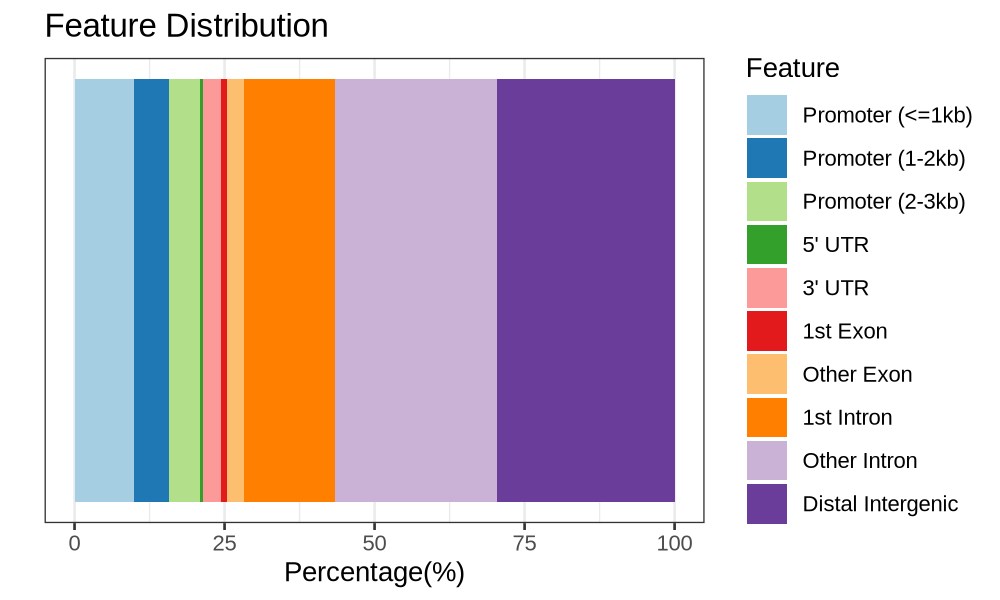

In [33]:
%%R -w 1000 -h 600 -r 180
plotAnnoBar(gr_anno)

In [63]:
%%R
telocal_sel_seqino_ann = merge(telocal_sel_seqino[!duplicated(ctype_gene), ], telocal_anno_dt, by.x = 'ctype_gene', by.y = 'name', all.x = T)

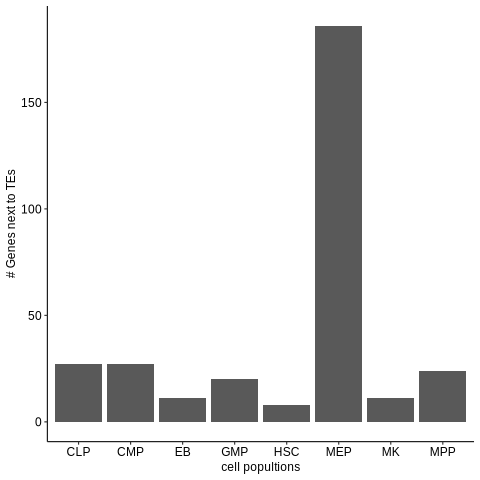

In [82]:
%%R
tmp = as.data.frame.matrix(table(telocal_sel_seqino_ann[!is.na(SYMBOL) & abs(distanceToTSS) < 3000, SYMBOL],  telocal_sel_seqino_ann[!is.na(SYMBOL) & abs(distanceToTSS) < 3000, cell_type]) )
tmp2 = as.data.table(apply(tmp, 2, sum), keep.rownames = T)
setnames(tmp2, c('cell_type', 'ene_num'))
tmp2[, cell_type := factor(cell_type, levels = c(cell_type))] 
ggplot(tmp2, aes(cell_type, ene_num)) + geom_bar(stat = 'identity') + theme_pubr() + xlab('cell popultions') + ylab('# Genes next to TEs')


In [67]:
%%R
base_dir = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/'
setwd(base_dir)


In [ ]:
%%R
fwrite(telocal_sel_seqino_ann, file = 'data/telocal_sel_seqino_ann.tsv')


In [93]:
%%R
table(telocal_sel_seqino_ann$cell_type)


CLP CMP  EB GMP HSC MEP  MK MPP 
119  87  84  79  55 911  71  99 

In [94]:
%%R
cell_types = c('HSC', 'MPP', 'CMP', 'GMP', 'MEP', 'CLP', 'EB', 'MK')
sample_names = c('HSC1', 'HSC2', 'HSC3', 'MPP1', 'MPP2', 'MPP3', 'CMP1', 'CMP2', 
                 'CMP3', 'GMP1', 'GMP2', 'GMP3', 'MEP1', 'MEP2', 'MEP3', 'MEP4', 'CLP1', 'CLP2', 'CLP3', 'EB1', 
                 'EB2', 'EB3', 'MK1', 'MK2', 'MK3')
sample_names_n24 = c('HSC1', 'HSC2', 'HSC3', 'MPP1', 'MPP2', 'MPP3', 'CMP1', 'CMP2', 
                 'CMP3', 'GMP1', 'GMP2', 'GMP3', 'MEP1', 'MEP2', 'MEP3', 'MEP4', 'CLP1', 'CLP3', 'EB1', 
                 'EB2', 'EB3', 'MK1', 'MK2', 'MK3')


In [105]:
%%R
dsn_epi_sel = dsn2[cell_type %in% cell_types, ]
dsn_epi_sel[, cell_type := factor(cell_type, levels = cell_types)] 
dsn_epi_sel = dsn_epi_sel[order(cell_type), ]
dim(dsn_epi_sel)


[1] 14 78

In [104]:
%%R
head(dsn_epi_sel[, .(sample_name, peak_file)] )
dim(dsn_epi_sel[, .(sample_name, peak_file)] )

[1] 14  2


In [54]:
%%R
setwd('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/')


In [55]:
%%R
write(tmp2$SYMBOL, file = 'gene_sel.bed')


In [108]:
%%R
gene_bed = fread('~/WenhuoHu/workspace/t2t_gene.bed')
tmp = telocal_sel_seqino_ann[!is.na(SYMBOL) & abs(distanceToTSS) < 3000,][!duplicated(SYMBOL), ]
gene_sel = gene_bed[V4 %in% tmp$SYMBOL, ][!duplicated(V4), ]
fwrite(gene_sel, file = 'gene_sel.bed', sep = '\t', col.names = T) 
dim(gene_sel)


[1] 184   6


In [149]:
%R head(gene_sel)

V1        V2        V3         V4 V5 V6
1   chrY  13815840  13828749      DDX3Y  .  +
2  chr22  46731374  46734994      CDPF1  .  -
3  chr22  42605990  42610301     CYP2D6  .  -
4  chr22  42565116  42570369     NDUFA6  .  -
5  chr22  39143699  39152074  TOMM22-DT  .  -
6  chr22  37214144  37232056      IFT27  .  -

In [148]:
%%R -o cmd
cmd = paste0(" /home/whu78/conda3/envs/feb24/bin/computeMatrix reference-point -S ", paste(dsn_epi_sel$bigwig_file, collapse = ' '))
#cmd = paste0("computeMatrix reference-point -S ", paste(design$bigwig_file, collapse = ' '))
cmd = paste0(cmd, ' -a 3000 -b 3000 -p 10 -R gene_sel.bed ')
cmd = paste0(cmd, ' --samplesLabel ', paste(dsn_epi_sel$cell_type, collapse = ' '), ' -o matrix_mat_ref_run1.gz -p 5 --referencePoint TSS')
write(cmd, file = 'run1.sh')
cmd


[1] " /home/whu78/conda3/envs/feb24/bin/computeMatrix reference-point -S /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D4983_HSC_1/D4983_HSC_1_t2t.bw /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D6792_HSC_1/D6792_HSC_1_t2t.bw /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D2596_HSC_1/D2596_HSC_1_t2t.bw /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D7256_HSC_1/D7256_HSC_1_t2t.bw /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D2596_MPP_1/D2596_MPP_1_t2t.bw /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/run_atac_merged/D2596_CMP_1/D2596_CMP_1_t2t.bw /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/r

In [ ]:
! $cmd

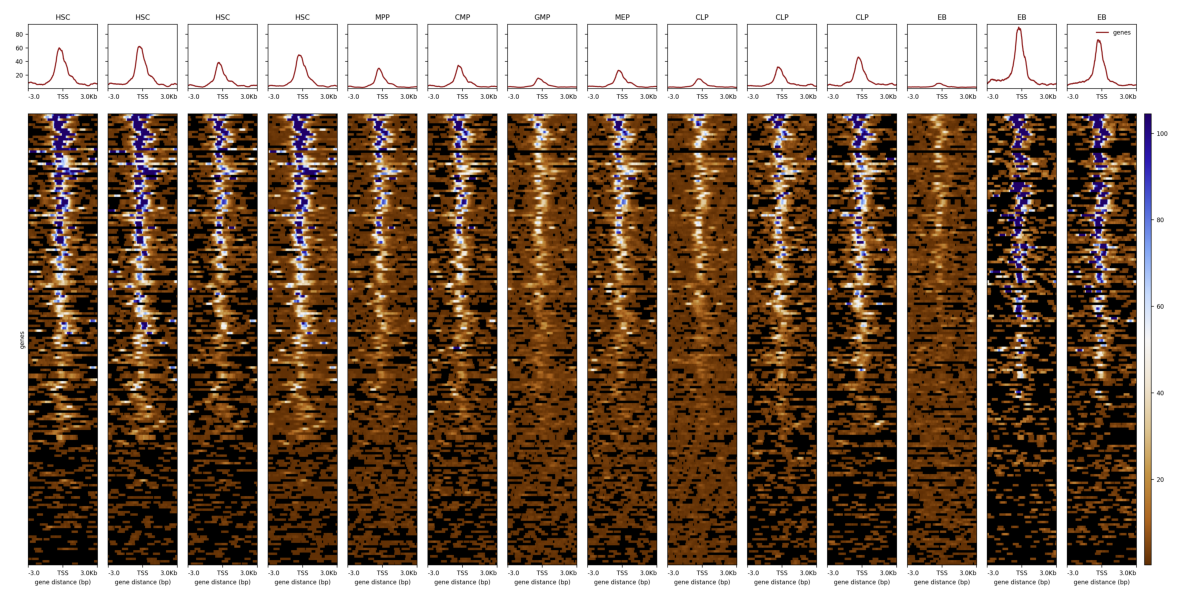

In [147]:
fname = 'ExampleHeatmap5.png'
im = cv2.imread(fname)
plt.figure(figsize = (15, 8))
plt.imshow(im)
plt.axis('off')
plt.show()

In [124]:
os.path.exists(fname)

True

![image](/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/ExampleHeatmap6.png)

![Image of Yaktocat](/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/ExampleHeatmap6.png)


![Image of Yaktocat](https://octodex.github.com/images/yaktocat.png)


In [120]:
from IPython.core.display import Image, display
display(Image(url='/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/ExampleHeatmap6.png', width=1900, unconfined=True))


In [118]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/ExampleHeatmap6.png")


![title](./ExampleHeatmap6.png)


CondaError: Run 'conda init' before 'conda activate'



# export

In [308]:
saveRDS(atac_peaks, file = 'data/atac_peaks.rds')
saveRDS(reduced, file = 'data/reduced.rds')
saveRDS(reduced_df, file = 'data/reduced_df.rds')
saveRDS(sum_dt, file = 'data/sum_dt.rds')
